In [50]:
!pip install scikit-posthocs

In [ ]:
# Essential libraries to import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scikit_posthocs as sp
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## loading datas from csv

In [3]:
bat_landings = pd.read_csv('dataset1.csv')
observation_windows = pd.read_csv('dataset2.csv')

## generating basic infos from dataset

In [4]:
bat_landings.info()
bat_landings.head()
bat_landings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB


,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,11.713134,282.877619,0.495039,0.533627,3.800441,5.531863,0.833517
std,27.644410,240.974918,0.500251,0.499143,1.199190,2.414146,0.372719
min,0.010238,0.000000,0.000000,0.000000,0.000000,-0.261667,0.000000
25%,1.000000,89.500000,0.000000,0.000000,4.000000,3.779028,1.000000
50%,4.000000,206.000000,0.000000,1.000000,4.000000,5.622778,1.000000
75%,11.500000,446.500000,1.000000,1.000000,5.000000,7.402778,1.000000
max,443.000000,949.000000,1.000000,1.000000,5.000000,12.091944,1.000000


In [5]:
observation_windows.info()
observation_windows.head()
observation_windows.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                2123 non-null   object 
 1   month               2123 non-null   int64  
 2   hours_after_sunset  2123 non-null   float64
 3   bat_landing_number  2123 non-null   int64  
 4   food_availability   2123 non-null   float64
 5   rat_minutes         2123 non-null   float64
 6   rat_arrival_number  2123 non-null   int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 116.2+ KB


,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
std,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000


In [61]:
observation_windows

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number,hours_bin,rat_arrival_bin,time_parsed,window_start,window_end,rat_density,rat_density_bin,hour_bin
0,2017-12-26 16:13:00,0,-0.5,20,4.000000,0.0,0,NaN,NaN,2017-12-26 16:13:00,2017-12-26 16:13:00,2017-12-26 16:43:00,0.0,low,-0.5
1,2017-12-26 16:43:00,0,0.0,28,4.000000,0.0,0,"[0.0, 1.0)",NaN,2017-12-26 16:43:00,2017-12-26 16:43:00,2017-12-26 17:13:00,0.0,low,0.0
2,2017-12-26 17:13:00,0,0.5,25,4.000000,0.0,0,"[0.0, 1.0)",NaN,2017-12-26 17:13:00,2017-12-26 17:13:00,2017-12-26 17:43:00,0.0,low,0.5
3,2017-12-26 17:43:00,0,1.0,71,4.000000,0.0,0,"[1.0, 2.0)",NaN,2017-12-26 17:43:00,2017-12-26 17:43:00,2017-12-26 18:13:00,0.0,low,1.0
4,2017-12-26 18:13:00,0,1.5,44,3.753857,0.0,0,"[1.0, 2.0)",NaN,2017-12-26 18:13:00,2017-12-26 18:13:00,2017-12-26 18:43:00,0.0,low,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2118,2018-06-01 03:41:00,6,8.0,20,1.000000,0.0,0,"[8.0, 9.0)",NaN,2018-06-01 03:41:00,2018-06-01 03:41:00,2018-06-01 04:11:00,0.0,low,8.0
2119,2018-06-01 04:11:00,6,8.5,7,1.000000,0.0,0,"[8.0, 9.0)",NaN,2018-06-01 04:11:00,2018-06-01 04:11:00,2018-06-01 04:41:00,0.0,low,8.5
2120,2018-06-01 04:41:00,6,9.0,6,1.000000,0.0,0,"[9.0, 10.0)",NaN,2018-06-01 04:41:00,2018-06-01 04:41:00,2018-06-01 05:11:00,0.0,low,9.0
2121,2018-06-01 05:11:00,6,9.5,7,1.000000,0.0,0,"[9.0, 10.0)",NaN,2018-06-01 05:11:00,2018-06-01 05:11:00,2018-06-01 05:41:00,0.0,low,9.5


In [6]:
bat_landings['start_time'] = pd.to_datetime(bat_landings['start_time'])
bat_landings['rat_period_start'] = pd.to_datetime(bat_landings['rat_period_start'])
bat_landings['rat_period_end'] = pd.to_datetime(bat_landings['rat_period_end'])
bat_landings['sunset_time'] = pd.to_datetime(bat_landings['sunset_time'])
observation_windows["time"] = pd.to_datetime(observation_windows["time"])

In [7]:
bat_landings.info()
bat_landings.head()
bat_landings.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 907 non-null    datetime64[ns]
 1   bat_landing_to_food        907 non-null    float64       
 2   habit                      866 non-null    object        
 3   rat_period_start           907 non-null    datetime64[ns]
 4   rat_period_end             907 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  907 non-null    int64         
 6   risk                       907 non-null    int64         
 7   reward                     907 non-null    int64         
 8   month                      907 non-null    int64         
 9   sunset_time                907 non-null    datetime64[ns]
 10  hours_after_sunset         907 non-null    float64       
 11  season                     907 non-null    int64         
dtypes: datet

,start_time,bat_landing_to_food,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
count,907,907.000000,907,907,907.000000,907.000000,907.000000,907.000000,907,907.000000,907.000000
mean,2018-04-11 20:41:27.056229120,11.713134,2018-04-11 20:36:43.395810304,2018-04-11 20:45:54.178610944,282.877619,0.495039,0.533627,3.800441,2018-04-11 15:10:02.050716672,5.531863,0.833517
min,2017-12-26 20:57:00,0.010238,2017-12-26 20:53:00,2017-12-26 20:58:00,0.000000,0.000000,0.000000,0.000000,2017-12-26 16:43:00,-0.261667,0.000000
25%,2018-04-03 23:29:00,1.000000,2018-04-03 23:24:00,2018-04-03 23:40:00,89.500000,0.000000,0.000000,4.000000,2018-04-03 19:01:00,3.779028,1.000000
50%,2018-04-27 00:28:00,4.000000,2018-04-27 00:24:00,2018-04-27 00:28:00,206.000000,0.000000,1.000000,4.000000,2018-04-26 19:17:00,5.622778,1.000000
75%,2018-05-01 00:07:30,11.500000,2018-05-01 00:06:00,2018-05-01 00:09:00,446.500000,1.000000,1.000000,5.000000,2018-04-30 19:20:00,7.402778,1.000000
max,2018-05-31 23:34:00,443.000000,2018-05-31 23:31:00,2018-05-31 23:34:00,949.000000,1.000000,1.000000,5.000000,2018-05-31 19:41:00,12.091944,1.000000
std,NaN,27.644410,NaN,NaN,240.974918,0.500251,0.499143,1.199190,NaN,2.414146,0.372719


In [8]:
observation_windows.info()
observation_windows.head()
observation_windows.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                2123 non-null   datetime64[ns]
 1   month               2123 non-null   int64         
 2   hours_after_sunset  2123 non-null   float64       
 3   bat_landing_number  2123 non-null   int64         
 4   food_availability   2123 non-null   float64       
 5   rat_minutes         2123 non-null   float64       
 6   rat_arrival_number  2123 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3)
memory usage: 116.2 KB


,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,2018-03-19 17:54:20.970324992,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
min,2017-12-26 16:13:00,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-02-06 01:03:00,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,2018-04-04 05:01:00,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,2018-04-30 23:35:00,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,2018-06-01 05:41:00,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000
std,NaN,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195


In [9]:
print("\nDuplicate Rows in Bat Landings:", bat_landings.duplicated().sum())
print("Duplicate Rows in Observation Windows:", observation_windows.duplicated().sum())


Duplicate Rows in Bat Landings: 1
Duplicate Rows in Observation Windows: 0


In [10]:
print("\nBat Landings - Summary Statistics:")
print(bat_landings.describe())
print("\nObservation Windows - Summary Statistics:")
print(observation_windows.describe())


Bat Landings - Summary Statistics:
                          start_time  bat_landing_to_food  \
count                            907           907.000000   
mean   2018-04-11 20:41:27.056229120            11.713134   
min              2017-12-26 20:57:00             0.010238   
25%              2018-04-03 23:29:00             1.000000   
50%              2018-04-27 00:28:00             4.000000   
75%              2018-05-01 00:07:30            11.500000   
max              2018-05-31 23:34:00           443.000000   
std                              NaN            27.644410   

                    rat_period_start                 rat_period_end  \
count                            907                            907   
mean   2018-04-11 20:36:43.395810304  2018-04-11 20:45:54.178610944   
min              2017-12-26 20:53:00            2017-12-26 20:58:00   
25%              2018-04-03 23:24:00            2018-04-03 23:40:00   
50%              2018-04-27 00:24:00            2018-04-27 

In [11]:
# Missing values
print("\nBat Landings - Missing Values:")
print(bat_landings.isnull().sum())
print("\nBat Landings - Missing Value Percentages:")
print((bat_landings.isnull().sum() / len(bat_landings) * 100).round(2))

print("\nObservation Windows - Missing Values:")
print(observation_windows.isnull().sum())
print("\nObservation Windows - Missing Value Percentages:")
print((observation_windows.isnull().sum() / len(observation_windows) * 100).round(2))


Bat Landings - Missing Values:
start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
dtype: int64

Bat Landings - Missing Value Percentages:
start_time                   0.00
bat_landing_to_food          0.00
habit                        4.52
rat_period_start             0.00
rat_period_end               0.00
seconds_after_rat_arrival    0.00
risk                         0.00
reward                       0.00
month                        0.00
sunset_time                  0.00
hours_after_sunset           0.00
season                       0.00
dtype: float64

Observation Windows - Missing Values:
time                  0
month                 0
hours_after_sunset

In [12]:
# Check dtypes
print("\nBat Landings - Data Types:")
print(bat_landings.dtypes)
print("\nObservation Windows - Data Types:")
print(observation_windows.dtypes)


Bat Landings - Data Types:
start_time                   datetime64[ns]
bat_landing_to_food                 float64
habit                                object
rat_period_start             datetime64[ns]
rat_period_end               datetime64[ns]
seconds_after_rat_arrival             int64
risk                                  int64
reward                                int64
month                                 int64
sunset_time                  datetime64[ns]
hours_after_sunset                  float64
season                                int64
dtype: object

Observation Windows - Data Types:
time                  datetime64[ns]
month                          int64
hours_after_sunset           float64
bat_landing_number             int64
food_availability            float64
rat_minutes                  float64
rat_arrival_number             int64
dtype: object


In [13]:
# IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    return outliers

# Z-score method
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = np.abs(stats.zscore(data[column].dropna()))
    outliers = data[z_scores > threshold][column]
    return outliers

# Example for key numerical columns
for col in ['bat_landing_to_food', 'seconds_after_rat_arrival']:  # Adjust columns as needed
    print(f"\nBat Landings - Outliers in {col} (IQR):")
    print(detect_outliers_iqr(bat_landings, col).count())
    print(f"Bat Landings - Outliers in {col} (Z-score):")
    print(detect_outliers_zscore(bat_landings, col).count())

for col in ['bat_landing_number', 'rat_minutes']:  # Adjust columns as needed
    print(f"\nObservation Windows - Outliers in {col} (IQR):")
    print(detect_outliers_iqr(observation_windows, col).count())
    print(f"Observation Windows - Outliers in {col} (Z-score):")
    print(detect_outliers_zscore(observation_windows, col).count())


Bat Landings - Outliers in bat_landing_to_food (IQR):
88
Bat Landings - Outliers in bat_landing_to_food (Z-score):
16

Bat Landings - Outliers in seconds_after_rat_arrival (IQR):
0
Bat Landings - Outliers in seconds_after_rat_arrival (Z-score):
0

Observation Windows - Outliers in bat_landing_number (IQR):
24
Observation Windows - Outliers in bat_landing_number (Z-score):
13

Observation Windows - Outliers in rat_minutes (IQR):
511
Observation Windows - Outliers in rat_minutes (Z-score):
42


In [14]:
# Check unique values in categorical columns
for col in bat_landings.select_dtypes(include='object').columns:
    print(f"\nBat Landings - Unique values in {col}:")
    print(bat_landings[col].value_counts())

for col in observation_windows.select_dtypes(include='object').columns:
    print(f"\nObservation Windows - Unique values in {col}:")
    print(observation_windows[col].value_counts())


Bat Landings - Unique values in habit:
habit
fast                                                245
rat                                                 221
pick                                                139
bat                                                  30
bat_fight                                            26
                                                   ... 
bat_fight_and_rat                                     1
rat_and_rat                                           1
not_sure_rat                                          1
501.0,358.4,636.2,423.4; 476.0,103.0,634.0,206.0      1
rat_and_bat_and_pick                                  1
Name: count, Length: 81, dtype: int64


In [15]:
# Check for negative values in time-related columns
for col in ['bat_landing_to_food', 'seconds_after_rat_arrival']:
    if col in bat_landings.columns:
        print(f"\nBat Landings - Negative values in {col}:")
        print((bat_landings[col] < 0).sum())

for col in ['rat_minutes']:
    if col in observation_windows.columns:
        print(f"\nObservation Windows - Negative values in {col}:")
        print((observation_windows[col] < 0).sum())

# Check datetime validity (example for datetime columns)
for col in bat_landings.select_dtypes(include='datetime64').columns:
    print(f"\nBat Landings - Invalid dates in {col}:")
    print(bat_landings[col].isna().sum())  # Add custom checks for impossible dates


Bat Landings - Negative values in bat_landing_to_food:
0

Bat Landings - Negative values in seconds_after_rat_arrival:
0

Observation Windows - Negative values in rat_minutes:
0

Bat Landings - Invalid dates in start_time:
0

Bat Landings - Invalid dates in rat_period_start:
0

Bat Landings - Invalid dates in rat_period_end:
0

Bat Landings - Invalid dates in sunset_time:
0


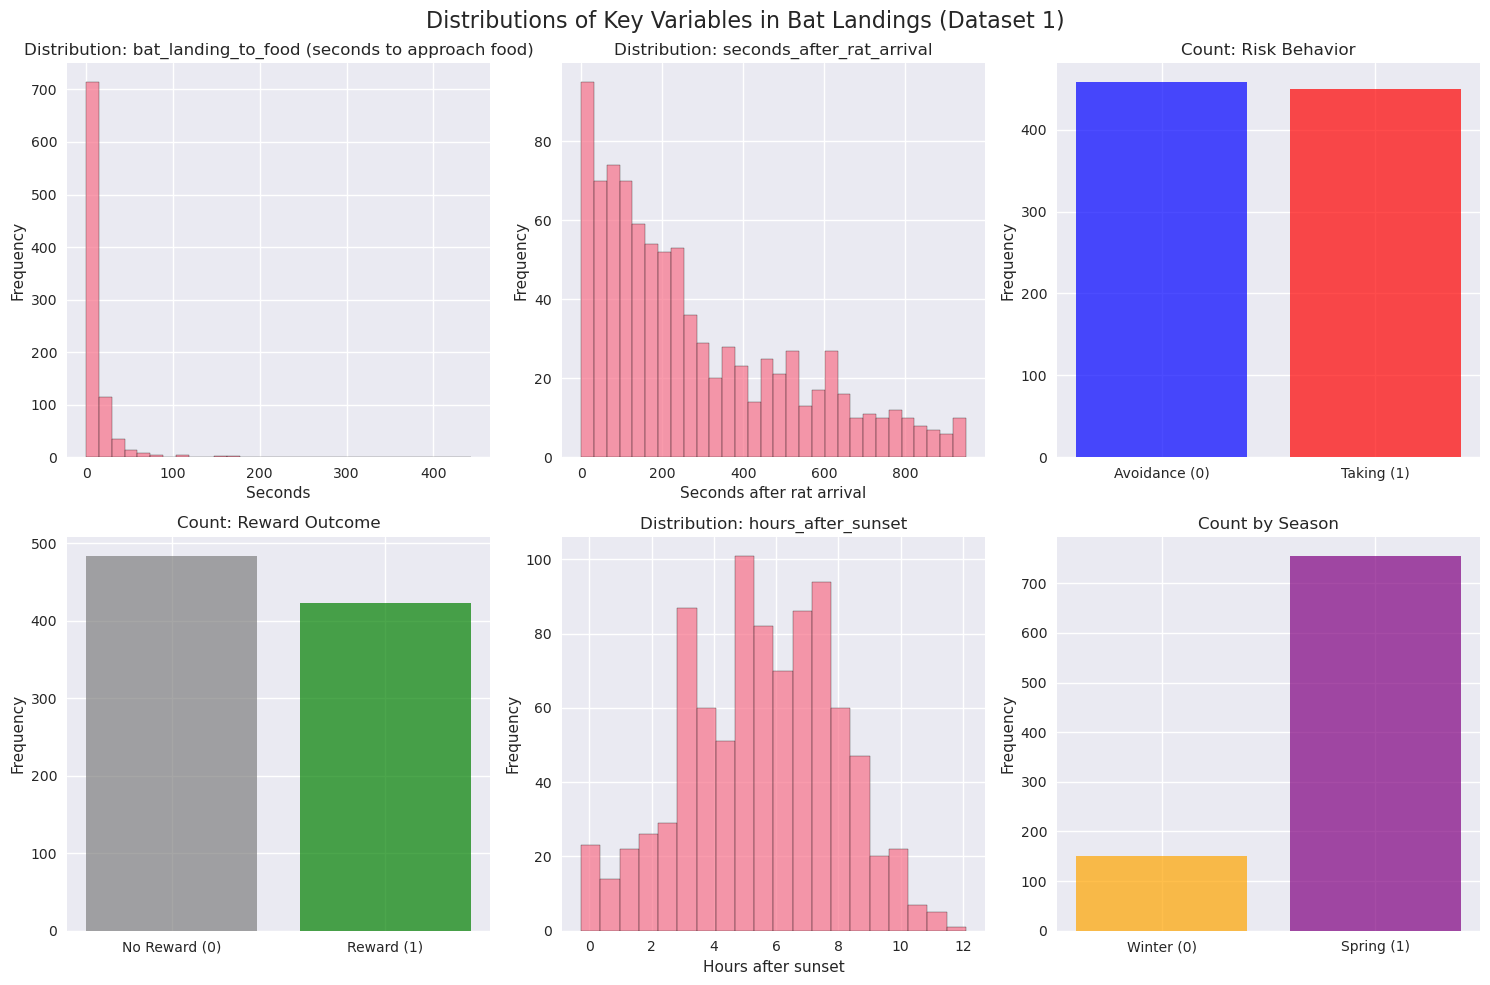

In [16]:
# Visualizing distributions of key variables in bat_landings (Dataset 1)
# Focus on vigilance proxy (bat_landing_to_food), rat timing (seconds_after_rat_arrival), and behaviors (risk, reward)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions of Key Variables in Bat Landings (Dataset 1)', fontsize=16)

# Histogram for bat_landing_to_food (vigilance: longer = more avoidance/vigilance)
axes[0, 0].hist(bat_landings['bat_landing_to_food'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution: bat_landing_to_food (seconds to approach food)')
axes[0, 0].set_xlabel('Seconds')
axes[0, 0].set_ylabel('Frequency')

# Histogram for seconds_after_rat_arrival (rat presence timing)
axes[0, 1].hist(bat_landings['seconds_after_rat_arrival'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution: seconds_after_rat_arrival')
axes[0, 1].set_xlabel('Seconds after rat arrival')
axes[0, 1].set_ylabel('Frequency')

# Bar plot for risk (0: avoidance, 1: taking)
risk_counts = bat_landings['risk'].value_counts()
axes[0, 2].bar(['Avoidance (0)', 'Taking (1)'], risk_counts.values, color=['blue', 'red'], alpha=0.7)
axes[0, 2].set_title('Count: Risk Behavior')
axes[0, 2].set_ylabel('Frequency')

# Bar plot for reward (0: no, 1: yes)
reward_counts = bat_landings['reward'].value_counts()
axes[1, 0].bar(['No Reward (0)', 'Reward (1)'], reward_counts.values, color=['gray', 'green'], alpha=0.7)
axes[1, 0].set_title('Count: Reward Outcome')
axes[1, 0].set_ylabel('Frequency')

# Histogram for hours_after_sunset (time of day patterns)
axes[1, 1].hist(bat_landings['hours_after_sunset'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution: hours_after_sunset')
axes[1, 1].set_xlabel('Hours after sunset')
axes[1, 1].set_ylabel('Frequency')

# Bar plot for season (0: winter?, 1: spring? based on data)
season_counts = bat_landings['season'].value_counts().sort_index()
axes[1, 2].bar(['Winter (0)', 'Spring (1)'], season_counts.values, color=['orange', 'purple'], alpha=0.7)
axes[1, 2].set_title('Count by Season')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

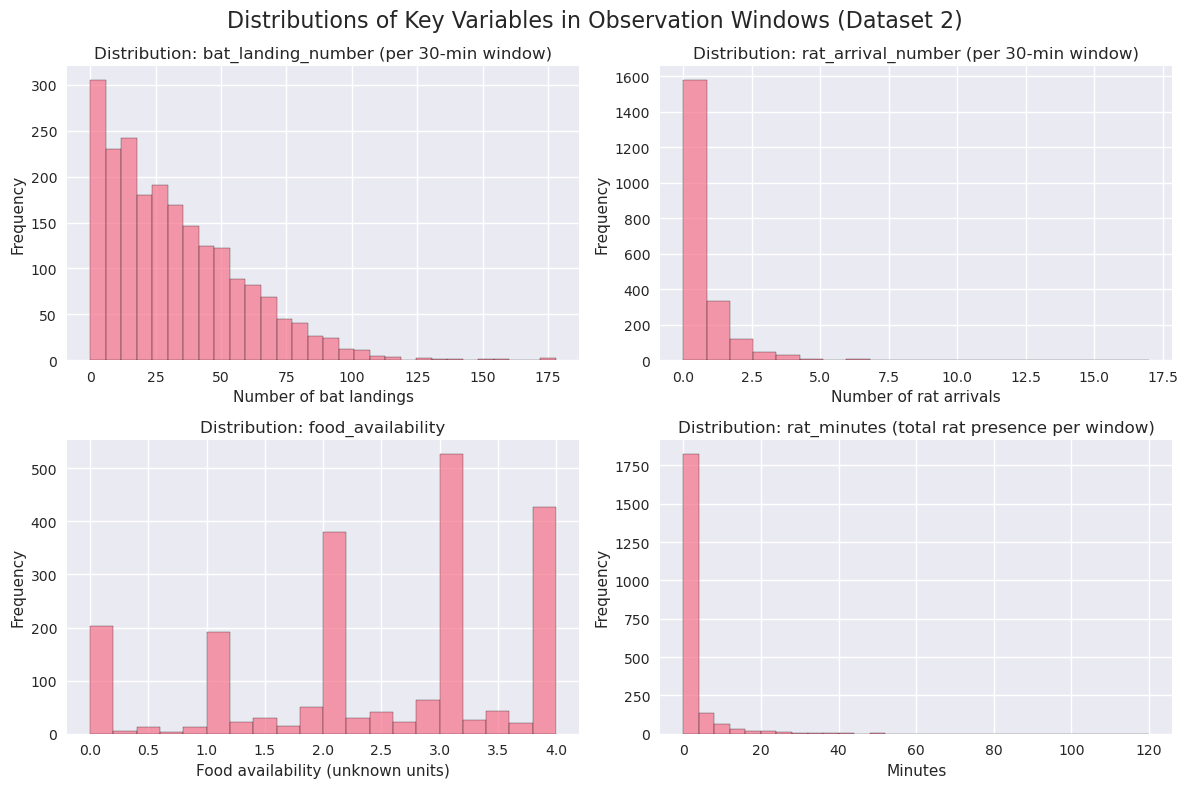

In [17]:
# Visualizing distributions in observation_windows (Dataset 2)
# Focus on bat_landing_number, rat_arrival_number, food_availability, rat_minutes

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distributions of Key Variables in Observation Windows (Dataset 2)', fontsize=16)

# Histogram for bat_landing_number
axes[0, 0].hist(observation_windows['bat_landing_number'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Distribution: bat_landing_number (per 30-min window)')
axes[0, 0].set_xlabel('Number of bat landings')
axes[0, 0].set_ylabel('Frequency')

# Histogram for rat_arrival_number
axes[0, 1].hist(observation_windows['rat_arrival_number'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution: rat_arrival_number (per 30-min window)')
axes[0, 1].set_xlabel('Number of rat arrivals')
axes[0, 1].set_ylabel('Frequency')

# Histogram for food_availability
axes[1, 0].hist(observation_windows['food_availability'], bins=20, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Distribution: food_availability')
axes[1, 0].set_xlabel('Food availability (unknown units)')
axes[1, 0].set_ylabel('Frequency')

# Histogram for rat_minutes (rat presence duration)
axes[1, 1].hist(observation_windows['rat_minutes'], bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Distribution: rat_minutes (total rat presence per window)')
axes[1, 1].set_xlabel('Minutes')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

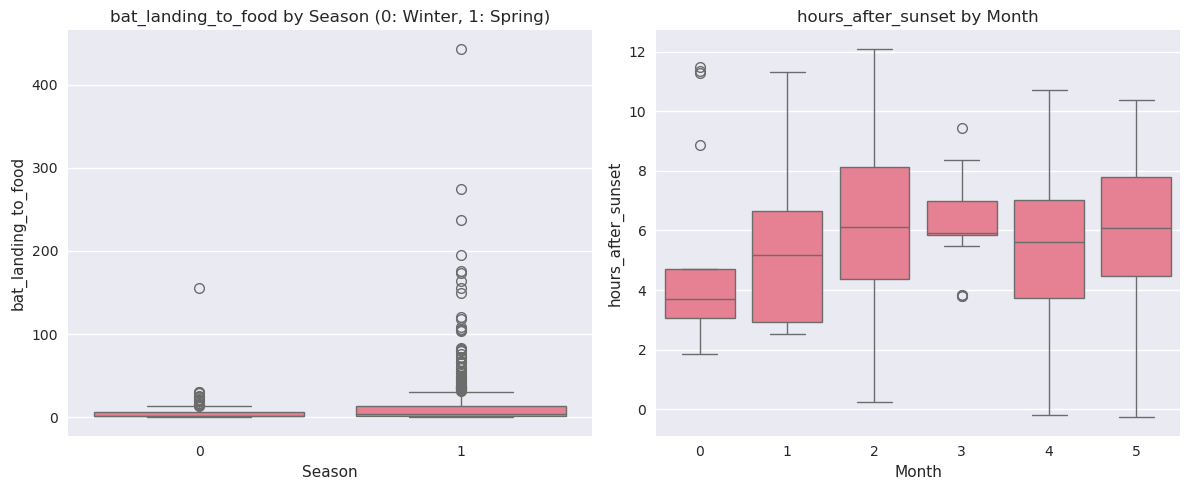

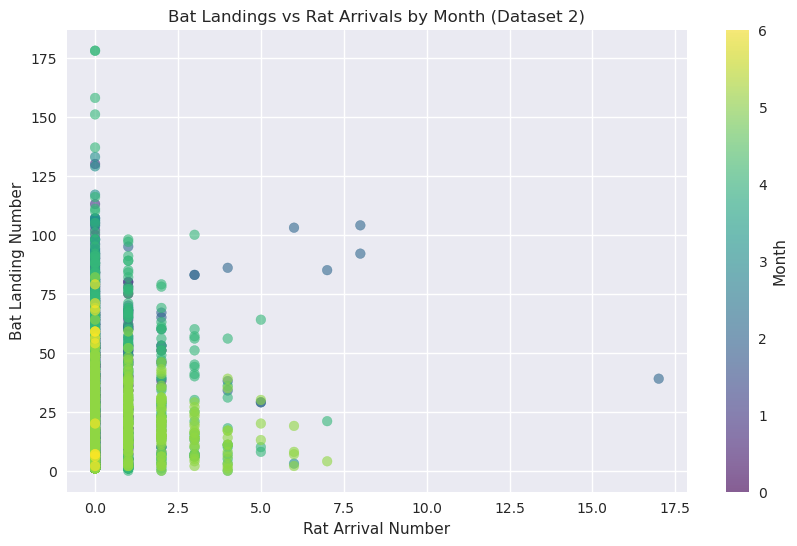

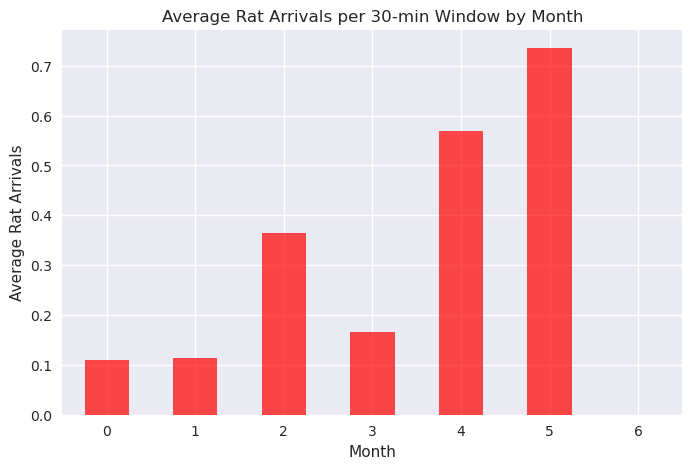

In [18]:
# Initial plots: Time of day patterns (hours_after_sunset) and seasonal/monthly patterns
# For bat_landings: Boxplot of bat_landing_to_food by season
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=bat_landings, x='season', y='bat_landing_to_food')
plt.title('bat_landing_to_food by Season (0: Winter, 1: Spring)')
plt.xlabel('Season')

plt.subplot(1, 2, 2)
sns.boxplot(data=bat_landings, x='month', y='hours_after_sunset')
plt.title('hours_after_sunset by Month')
plt.xlabel('Month')

plt.tight_layout()
plt.show()

# For observation_windows: Scatter plot of bat_landing_number vs rat_arrival_number colored by month
plt.figure(figsize=(10, 6))
scatter = plt.scatter(observation_windows['rat_arrival_number'], observation_windows['bat_landing_number'], 
                      c=observation_windows['month'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Month')
plt.xlabel('Rat Arrival Number')
plt.ylabel('Bat Landing Number')
plt.title('Bat Landings vs Rat Arrivals by Month (Dataset 2)')
plt.show()

# Monthly patterns in rat presence (average rat_arrival_number by month)
monthly_rat = observation_windows.groupby('month')['rat_arrival_number'].mean()
plt.figure(figsize=(8, 5))
monthly_rat.plot(kind='bar', color='red', alpha=0.7)
plt.title('Average Rat Arrivals per 30-min Window by Month')
plt.xlabel('Month')
plt.ylabel('Average Rat Arrivals')
plt.xticks(rotation=0)
plt.show()

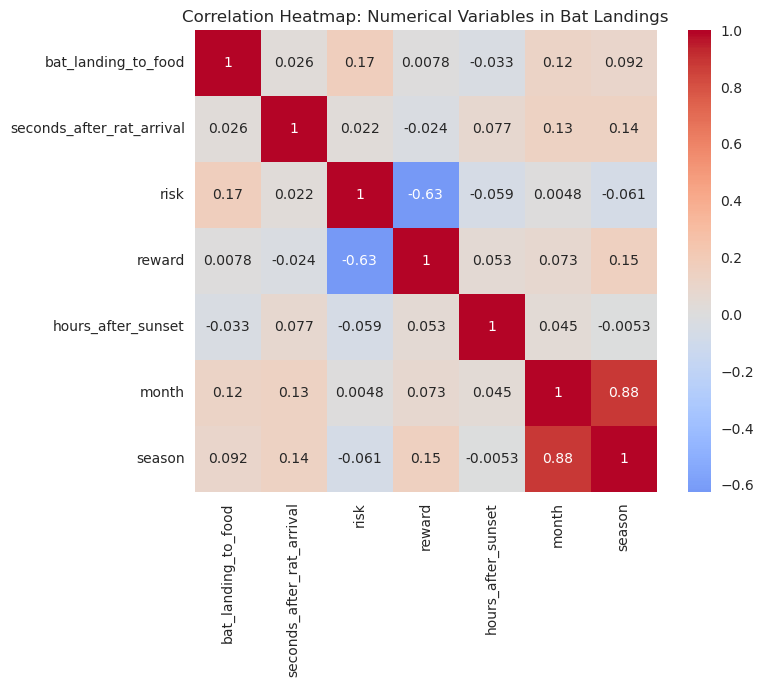

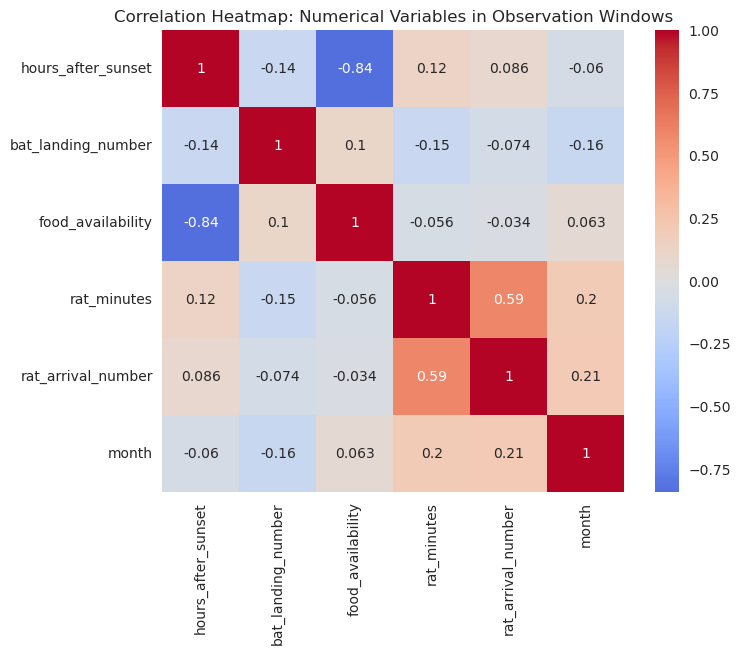

In [19]:
# Correlation heatmap for numerical variables in bat_landings
numerical_cols_bl = ['bat_landing_to_food', 'seconds_after_rat_arrival', 'risk', 'reward', 'hours_after_sunset', 'month', 'season']
corr_bl = bat_landings[numerical_cols_bl].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_bl, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap: Numerical Variables in Bat Landings')
plt.show()

# Correlation heatmap for numerical variables in observation_windows
numerical_cols_ow = ['hours_after_sunset', 'bat_landing_number', 'food_availability', 'rat_minutes', 'rat_arrival_number', 'month']
corr_ow = observation_windows[numerical_cols_ow].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_ow, annot=True, cmap='coolwarm', center=0, square=True)
plt.title('Correlation Heatmap: Numerical Variables in Observation Windows')
plt.show()

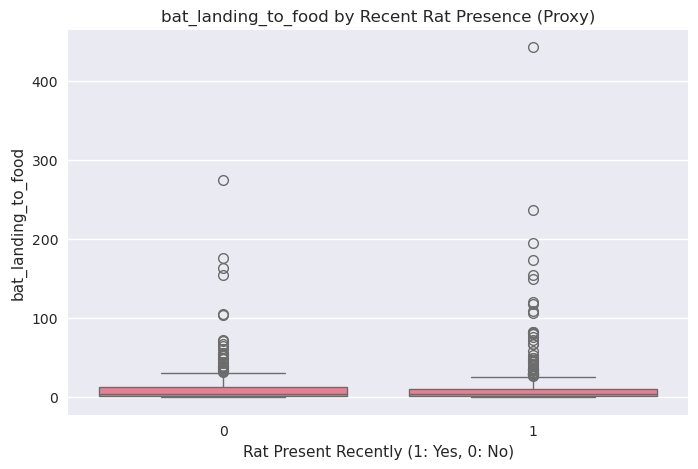

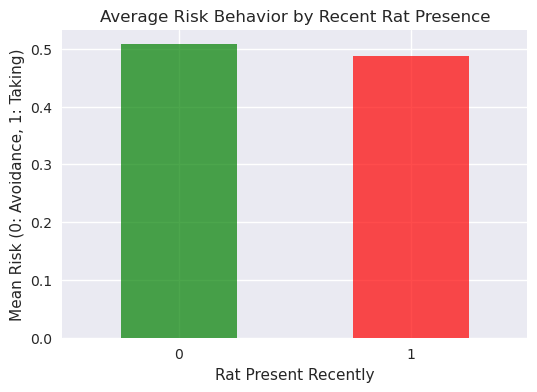

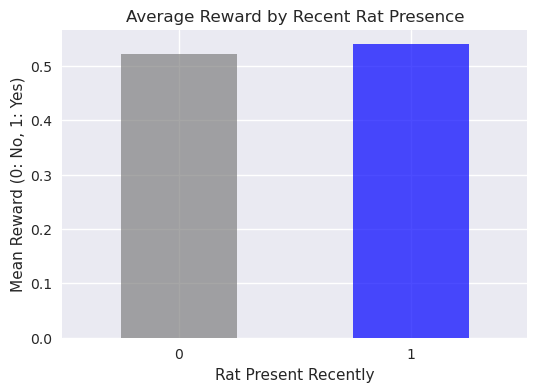

Summary: Mean bat_landing_to_food when rat_present_proxy=1: 11.415333756136677
Mean bat_landing_to_food when rat_present_proxy=0: 12.236320891294834
Mean risk when rat_present_proxy=1: 0.48788927335640137
Mean risk when rat_present_proxy=0: 0.5075987841945289


In [20]:
# Preliminary insight: Distributions by rat presence proxy
# Define a simple 'rat_present' flag for bat_landings: if seconds_after_rat_arrival <= some threshold (e.g., 300 sec = 5 min, assuming rat presence lingers)
# Note: This is initial; refine in Phase 3 with exact overlap using rat_period_start/end
bat_landings['rat_present_proxy'] = (bat_landings['seconds_after_rat_arrival'] <= 300).astype(int)  # 1: recent rat presence, 0: not recent

# Boxplot: bat_landing_to_food by rat_present_proxy
plt.figure(figsize=(8, 5))
sns.boxplot(data=bat_landings, x='rat_present_proxy', y='bat_landing_to_food')
plt.title('bat_landing_to_food by Recent Rat Presence (Proxy)')
plt.xlabel('Rat Present Recently (1: Yes, 0: No)')
plt.show()

# Bar plot: Risk by rat_present_proxy
risk_by_rat = bat_landings.groupby('rat_present_proxy')['risk'].mean()
plt.figure(figsize=(6, 4))
risk_by_rat.plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Average Risk Behavior by Recent Rat Presence')
plt.xlabel('Rat Present Recently')
plt.ylabel('Mean Risk (0: Avoidance, 1: Taking)')
plt.xticks(rotation=0)
plt.show()

# Similarly for reward
reward_by_rat = bat_landings.groupby('rat_present_proxy')['reward'].mean()
plt.figure(figsize=(6, 4))
reward_by_rat.plot(kind='bar', color=['gray', 'blue'], alpha=0.7)
plt.title('Average Reward by Recent Rat Presence')
plt.xlabel('Rat Present Recently')
plt.ylabel('Mean Reward (0: No, 1: Yes)')
plt.xticks(rotation=0)
plt.show()

# Print summary stats for initial patterns
print("Summary: Mean bat_landing_to_food when rat_present_proxy=1:", bat_landings[bat_landings['rat_present_proxy']==1]['bat_landing_to_food'].mean())
print("Mean bat_landing_to_food when rat_present_proxy=0:", bat_landings[bat_landings['rat_present_proxy']==0]['bat_landing_to_food'].mean())
print("Mean risk when rat_present_proxy=1:", bat_landings[bat_landings['rat_present_proxy']==1]['risk'].mean())
print("Mean risk when rat_present_proxy=0:", bat_landings[bat_landings['rat_present_proxy']==0]['risk'].mean())

In [21]:
# Phase 3: Data Cleaning & Preprocessing
# We'll handle missing values, clean 'habit' column (dirty data noted: 81 unique, some messy strings), 
# detect/ handle outliers, parse datetime columns, engineer better 'rat_present' flag using time overlap,
# and prepare for merge (add rat density proxy from dataset2 by matching month and binned hours_after_sunset).

# 1. Handle Missing Values
# Dataset1: Only 'habit' has missings (907-866=41 rows). For Investigation A (vigilance focus), we can drop these rows
# as habit may not be essential; alternatively, impute as 'unknown'. Here, drop for simplicity.
print("Before dropping missing habit:")
print(bat_landings.isnull().sum())
bat_landings_clean = bat_landings.dropna(subset=['habit'])
print("\nAfter dropping missing habit:")
print(bat_landings_clean.isnull().sum())
print("Shape after drop:", bat_landings_clean.shape)  # Should be ~866 rows

# Dataset2: No missings from earlier info, but confirm
print("\nObservation Windows nulls:")
print(observation_windows.isnull().sum())

# 2. Clean 'habit' Column (Dirty Data)
# From value_counts: Many categories, but messy ones like coordinates or long strings. 
# Standardize: Map to main categories (e.g., 'fast', 'rat', 'pick', 'bat', 'bat_fight', 'other')
# First, inspect messy ones (non-standard)
messy_habits = bat_landings_clean['habit'].value_counts()
print("\nTop 20 habits:")
print(messy_habits.head(20))

# Define a cleaning function: If contains numbers/coords or rare (<5 counts), set to 'other'; else keep as is
def clean_habit(habit):
    if pd.isna(habit):
        return 'unknown'
    habit_lower = habit.lower()
    if any(char.isdigit() for char in habit) or len(habit.split(',')) > 1 or habit in ['not_sure_rat', 'rat_and_rat']:  # Messy coords or rare
        return 'other'
    # Map common variants if needed (e.g., 'bat_fight_and_rat' -> 'bat_fight')
    if 'fight' in habit_lower and 'rat' in habit_lower:
        return 'bat_fight_rat'
    elif 'fight' in habit_lower:
        return 'bat_fight'
    elif 'rat' in habit_lower:
        return 'rat'
    elif 'pick' in habit_lower:
        return 'pick'
    elif 'bat' in habit_lower:
        return 'bat'
    elif 'fast' in habit_lower:
        return 'fast'
    else:
        return 'other'

bat_landings_clean['habit_clean'] = bat_landings_clean['habit'].apply(clean_habit)

# Check cleaned
print("\nUnique cleaned habits:")
print(bat_landings_clean['habit_clean'].value_counts())

Before dropping missing habit:
start_time                    0
bat_landing_to_food           0
habit                        41
rat_period_start              0
rat_period_end                0
seconds_after_rat_arrival     0
risk                          0
reward                        0
month                         0
sunset_time                   0
hours_after_sunset            0
season                        0
rat_present_proxy             0
dtype: int64

After dropping missing habit:
start_time                   0
bat_landing_to_food          0
habit                        0
rat_period_start             0
rat_period_end               0
seconds_after_rat_arrival    0
risk                         0
reward                       0
month                        0
sunset_time                  0
hours_after_sunset           0
season                       0
rat_present_proxy            0
dtype: int64
Shape after drop: (866, 13)

Observation Windows nulls:
time                  0
month        

In [22]:
# 3. Outlier Detection and Handling
# Use IQR method for key continuous vars: bat_landing_to_food, seconds_after_rat_arrival, hours_after_sunset
# Decision: Cap outliers at 1.5*IQR (winsorize) instead of remove, to preserve data for vigilance analysis
# (Long times may indicate real vigilance)

def detect_outliers_iqr(df, col, multiplier=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: Outliers = {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    print(f"Bounds: [{lower_bound:.2f}, {upper_bound:.2f}]")
    return lower_bound, upper_bound

# For bat_landings_clean
for col in ['bat_landing_to_food', 'seconds_after_rat_arrival', 'hours_after_sunset']:
    detect_outliers_iqr(bat_landings_clean, col)

# Winsorize (cap) outliers
def winsorize_col(df, col, lower_bound, upper_bound):
    df[col + '_clean'] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply for bat_landing_to_food (example; repeat for others if needed)
lower_bltf, upper_bltf = detect_outliers_iqr(bat_landings_clean, 'bat_landing_to_food')  # Re-run to get bounds
bat_landings_clean = winsorize_col(bat_landings_clean, 'bat_landing_to_food', lower_bltf, upper_bltf)

# Similarly for seconds_after_rat_arrival (but since >=0, only upper)
lower_sara, upper_sara = detect_outliers_iqr(bat_landings_clean, 'seconds_after_rat_arrival')
bat_landings_clean = winsorize_col(bat_landings_clean, 'seconds_after_rat_arrival', lower_sara, upper_sara)

# For hours_after_sunset (likely no negatives)
lower_has, upper_has = detect_outliers_iqr(bat_landings_clean, 'hours_after_sunset')
bat_landings_clean = winsorize_col(bat_landings_clean, 'hours_after_sunset', lower_has, upper_has)

# For Dataset2 (if needed, e.g., bat_landing_number has high variance)
for col in ['bat_landing_number', 'rat_arrival_number', 'rat_minutes']:
    detect_outliers_iqr(observation_windows, col)
# Optionally winsorize Dataset2 similarly if extremes skew aggregates

bat_landing_to_food: Outliers = 81 (9.4%)
Bounds: [-15.50, 28.50]
seconds_after_rat_arrival: Outliers = 0 (0.0%)
Bounds: [-431.50, 956.50]
hours_after_sunset: Outliers = 0 (0.0%)
Bounds: [-1.58, 12.78]
bat_landing_to_food: Outliers = 81 (9.4%)
Bounds: [-15.50, 28.50]
seconds_after_rat_arrival: Outliers = 0 (0.0%)
Bounds: [-431.50, 956.50]
hours_after_sunset: Outliers = 0 (0.0%)
Bounds: [-1.58, 12.78]
bat_landing_number: Outliers = 24 (1.1%)
Bounds: [-44.50, 103.50]
rat_arrival_number: Outliers = 92 (4.3%)
Bounds: [-1.50, 2.50]
rat_minutes: Outliers = 511 (24.1%)
Bounds: [-0.24, 0.40]


In [26]:
# 4. Data Types: Parse Datetime Columns
# Assuming format like 'HH:MM:SS' or 'YYYY-MM-DD HH:MM:SS' (from strings). Use errors='coerce' for invalid.
# For overlap, we'll extract time components. Assume same day for comparison.

# Try parsing (adjust format if needed, e.g., '%H:%M:%S' if time-only)
bat_landings_clean['start_time'] = pd.to_datetime(bat_landings_clean['start_time'], format='%H:%M:%S', errors='coerce')
bat_landings_clean['rat_period_start'] = pd.to_datetime(bat_landings_clean['rat_period_start'], format='%H:%M:%S', errors='coerce')
bat_landings_clean['rat_period_end'] = pd.to_datetime(bat_landings_clean['rat_period_end'], format='%H:%M:%S', errors='coerce')
bat_landings_clean['sunset_time'] = pd.to_datetime(bat_landings_clean['sunset_time'], format='%H:%M:%S', errors='coerce')

# Check parsing success
print("Datetime parsing success rates:")
for col in ['start_time', 'rat_period_start', 'rat_period_end', 'sunset_time']:
    success_rate = (bat_landings_clean[col].notna()).sum() / len(bat_landings_clean)
    print(f"{col}: {success_rate:.2%} successful")

# If low success, try alternative format (e.g., full datetime '%Y-%m-%d %H:%M:%S')
# bat_landings_clean['start_time'] = pd.to_datetime(bat_landings_clean['start_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# Re-run if needed and adjust.

# Drop rows where key datetimes failed (if any)
bat_landings_clean = bat_landings_clean.dropna(subset=['start_time', 'rat_period_start', 'rat_period_end'])
print("Shape after datetime drop:", bat_landings_clean.shape)

Datetime parsing success rates:
start_time: 100.00% successful
rat_period_start: 100.00% successful
rat_period_end: 100.00% successful
sunset_time: 100.00% successful
Shape after datetime drop: (866, 20)


In [24]:
# 5. Feature Engineering: Better 'rat_present' Flag
# rat_present = 1 if bat start_time is within rat_period_start and rat_period_end (overlap)
# Since times parsed, compare as time-of-day (ignore date)

def is_within_period(bat_time, rat_start, rat_end):
    if pd.isna(bat_time) or pd.isna(rat_start) or pd.isna(rat_end):
        return 0
    # Convert to seconds since midnight for easy comparison
    bat_sec = bat_time.hour * 3600 + bat_time.minute * 60 + bat_time.second
    rat_start_sec = rat_start.hour * 3600 + rat_start.minute * 60 + rat_start.second
    rat_end_sec = rat_end.hour * 3600 + rat_end.minute * 60 + rat_end.second
    # Handle overnight? Assume no (nocturnal, periods within night)
    return 1 if rat_start_sec <= bat_sec <= rat_end_sec else 0

bat_landings_clean['rat_present'] = bat_landings_clean.apply(
    lambda row: is_within_period(row['start_time'], row['rat_period_start'], row['rat_period_end']), axis=1
)

# Also, create 'vigilance_proxy': 1 if bat_landing_to_food > median (long delay = high vigilance)
median_bltf = bat_landings_clean['bat_landing_to_food_clean'].median()
bat_landings_clean['vigilance_proxy'] = (bat_landings_clean['bat_landing_to_food_clean'] > median_bltf).astype(int)

print("Rat present distribution:")
print(bat_landings_clean['rat_present'].value_counts(normalize=True))
print("\nVigilance proxy distribution:")
print(bat_landings_clean['vigilance_proxy'].value_counts(normalize=True))

# Update proxy summary with new rat_present
print("\nUpdated Summary with better rat_present:")
print("Mean bat_landing_to_food_clean when rat_present=1:", bat_landings_clean[bat_landings_clean['rat_present']==1]['bat_landing_to_food_clean'].mean())
print("Mean bat_landing_to_food_clean when rat_present=0:", bat_landings_clean[bat_landings_clean['rat_present']==0]['bat_landing_to_food_clean'].mean())
print("Mean risk when rat_present=1:", bat_landings_clean[bat_landings_clean['rat_present']==1]['risk'].mean())
print("Mean risk when rat_present=0:", bat_landings_clean[bat_landings_clean['rat_present']==0]['risk'].mean())

Rat present distribution:
rat_present
1    0.996536
0    0.003464
Name: proportion, dtype: float64

Vigilance proxy distribution:
vigilance_proxy
0    0.539261
1    0.460739
Name: proportion, dtype: float64

Updated Summary with better rat_present:
Mean bat_landing_to_food_clean when rat_present=1: 7.989663543419466
Mean bat_landing_to_food_clean when rat_present=0: 20.166666666666668
Mean risk when rat_present=1: 0.5191193511008111
Mean risk when rat_present=0: 0.3333333333333333


In [25]:
# 6. Merge Datasets: Add Rat Density Proxy from Dataset2
# Match on month and binned hours_after_sunset (e.g., bins of 1 hour) to add 'rat_arrival_number' as density
# First, bin hours_after_sunset in both
bat_landings_clean['hours_bin'] = pd.cut(bat_landings_clean['hours_after_sunset_clean'], bins=range(0, 13, 1), right=False)  # Hourly bins 0-12
observation_windows['hours_bin'] = pd.cut(observation_windows['hours_after_sunset'], bins=range(0, 13, 1), right=False)

# Aggregate Dataset2: Mean rat_arrival_number per month + hours_bin
rat_density = observation_windows.groupby(['month', 'hours_bin'])['rat_arrival_number'].mean().reset_index()
rat_density.rename(columns={'rat_arrival_number': 'rat_density_proxy'}, inplace=True)

# Merge on month and hours_bin
bat_landings_merged = bat_landings_clean.merge(rat_density, on=['month', 'hours_bin'], how='left')
print("Merge success: Shape after merge:", bat_landings_merged.shape)
print("Rat density proxy nulls (unmatched):", bat_landings_merged['rat_density_proxy'].isnull().sum())

# Fill unmatched with overall mean rat arrivals
overall_mean_rat = observation_windows['rat_arrival_number'].mean()
bat_landings_merged['rat_density_proxy'].fillna(overall_mean_rat, inplace=True)
print("Final rat density mean:", bat_landings_merged['rat_density_proxy'].mean())

# Now, bat_landings_merged is your cleaned, preprocessed main dataset for Phase 4
# Save if needed: bat_landings_merged.to_csv('bat_landings_cleaned.csv', index=False)

Merge success: Shape after merge: (866, 21)
Rat density proxy nulls (unmatched): 11
Final rat density mean: 0.6028669126602577


## phase 4

In [28]:
# Phase 4: Descriptive Analysis - Uncover Patterns
# Using bat_landings_merged (cleaned, with rat_present, vigilance_proxy, rat_density_proxy)
# Note: rat_present is highly imbalanced (99.7% =1, n=3 for 0) -- this suggests rat_period_start/end may be broad (e.g., entire observation window).
#       Comparisons limited; we'll also use alternatives: binned seconds_after_rat_arrival_clean (proximity) and rat_density_proxy.
#       Focus: Higher vigilance (longer bat_landing_to_food_clean, lower risk, lower reward) when rats present/proximal/dense?

# 1. Group by rat_present: Compare means (despite imbalance)
print("Descriptive Stats by rat_present:")
grouped_rat = bat_landings_merged.groupby('rat_present')[['bat_landing_to_food_clean', 'risk', 'reward', 'vigilance_proxy']].agg(['mean', 'std', 'count'])
print(grouped_rat)

# Since n=3 for 0, caution: Longer mean (20s vs 8s) without rats may be outlier; investigate those 3 rows
no_rat_rows = bat_landings_merged[bat_landings_merged['rat_present'] == 0]
print("\nRows where rat_present=0 (rare cases):")
print(no_rat_rows[['bat_landing_to_food_clean', 'seconds_after_rat_arrival_clean', 'risk', 'reward', 'hours_after_sunset_clean']])

# 2. Alternative Grouping: Bin seconds_after_rat_arrival_clean for rat proximity
# Bins: 'before' (<0), 'immediate' (0-60s), 'recent' (60-300s), 'old' (>300s)
bat_landings_merged['rat_proximity'] = pd.cut(bat_landings_merged['seconds_after_rat_arrival_clean'], 
                                             bins=[-np.inf, 0, 60, 300, np.inf], labels=['before', 'immediate', 'recent', 'old'])

print("\nRat proximity distribution:")
print(bat_landings_merged['rat_proximity'].value_counts())

grouped_prox = bat_landings_merged.groupby('rat_proximity')[['bat_landing_to_food_clean', 'risk', 'reward', 'vigilance_proxy']].agg(['mean', 'std', 'count'])
print("\nDescriptive Stats by rat_proximity:")
print(grouped_prox)

# Also by rat_density_proxy (quantile bins: low/med/high)
bat_landings_merged['rat_density_bin'] = pd.qcut(bat_landings_merged['rat_density_proxy'], q=3, labels=['low', 'med', 'high'])
print("\nRat density bin distribution:")
print(bat_landings_merged['rat_density_bin'].value_counts())

grouped_density = bat_landings_merged.groupby('rat_density_bin')[['bat_landing_to_food_clean', 'risk', 'reward', 'vigilance_proxy']].agg(['mean', 'std', 'count'])
print("\nDescriptive Stats by rat_density_bin:")
print(grouped_density)

Descriptive Stats by rat_present:
            bat_landing_to_food_clean                      risk            \
                                 mean       std count      mean       std   
rat_present                                                                 
0                           20.166667  9.385272     3  0.333333  0.577350   
1                            7.989664  9.148178   863  0.519119  0.499924   

                     reward                 vigilance_proxy                  
            count      mean       std count            mean       std count  
rat_present                                                                  
0               3  0.666667  0.577350     3        1.000000  0.000000     3  
1             863  0.558517  0.496852   863        0.458864  0.498594   863  

Rows where rat_present=0 (rare cases):
     bat_landing_to_food_clean  seconds_after_rat_arrival_clean  risk  reward  \
677                       10.0                              130     0

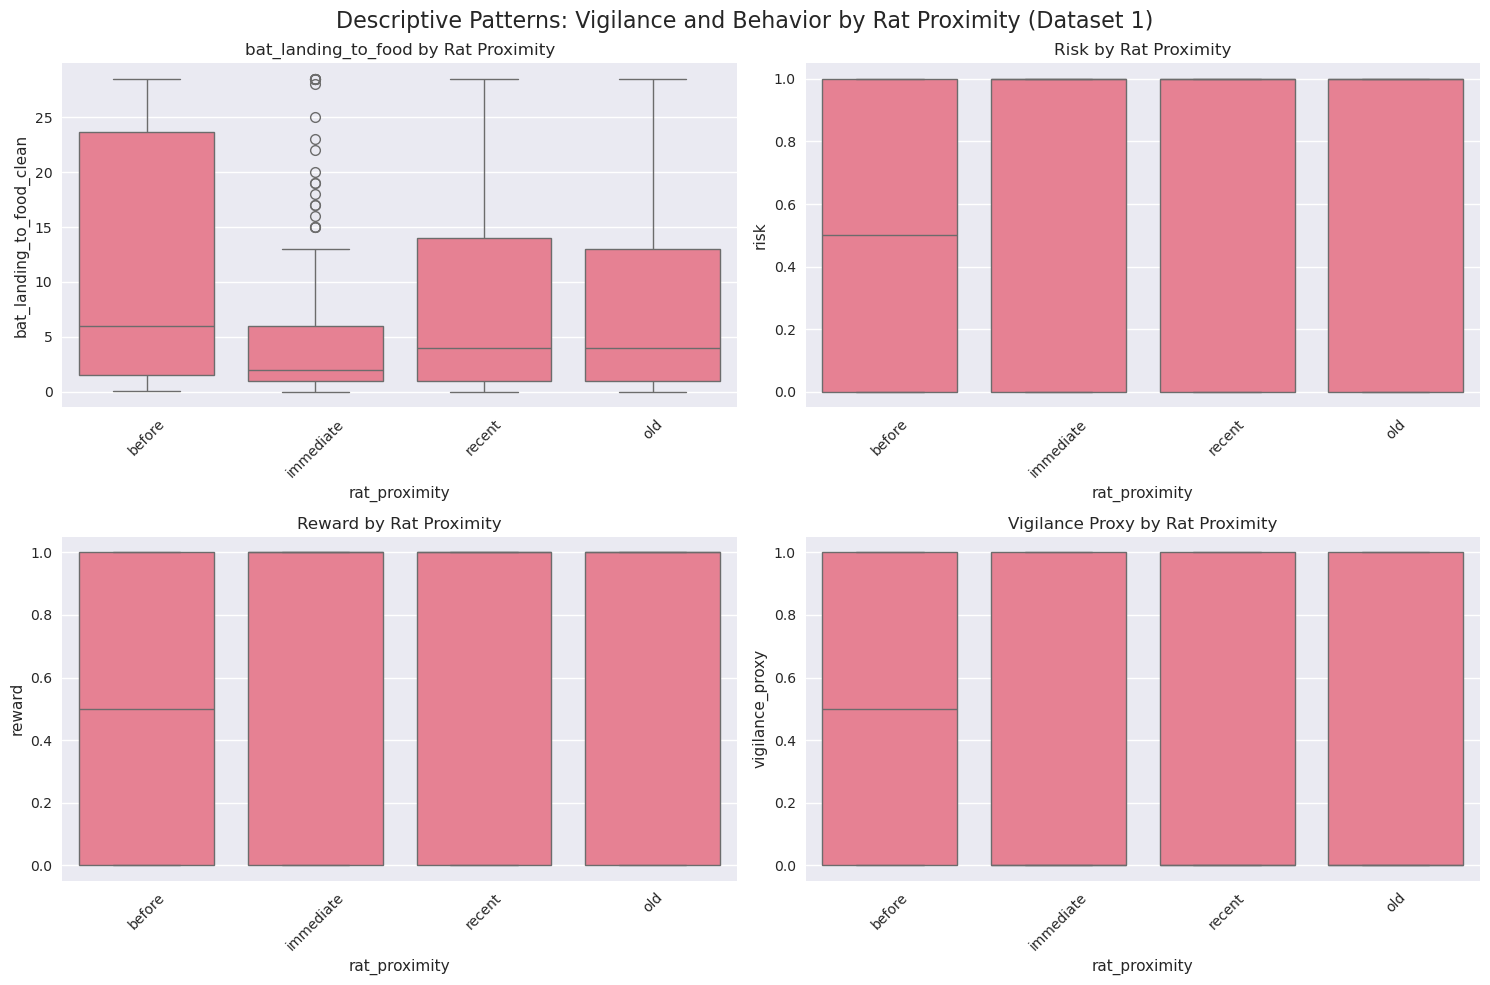

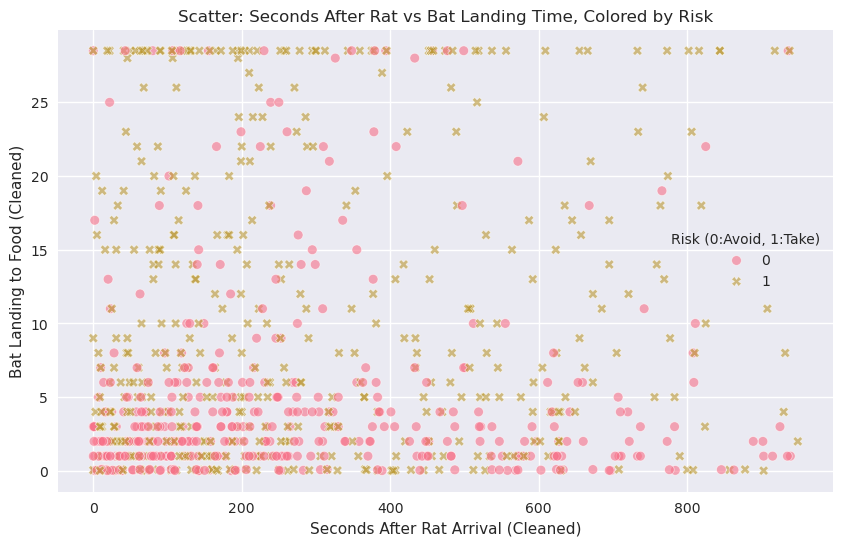

In [30]:
# 3. Plots: Boxplots of key vars by rat_proximity (better than imbalanced rat_present)
# Also scatter: seconds_after_rat_arrival_clean vs bat_landing_to_food_clean, colored by risk

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Descriptive Patterns: Vigilance and Behavior by Rat Proximity (Dataset 1)', fontsize=16)

# Boxplot: bat_landing_to_food_clean by rat_proximity
sns.boxplot(data=bat_landings_merged, x='rat_proximity', y='bat_landing_to_food_clean', ax=axes[0, 0])
axes[0, 0].set_title('bat_landing_to_food by Rat Proximity')
axes[0, 0].tick_params(axis='x', rotation=45)

# Boxplot: risk by rat_proximity
sns.boxplot(data=bat_landings_merged, x='rat_proximity', y='risk', ax=axes[0, 1])
axes[0, 1].set_title('Risk by Rat Proximity')
axes[0, 1].tick_params(axis='x', rotation=45)

# Boxplot: reward by rat_proximity
sns.boxplot(data=bat_landings_merged, x='rat_proximity', y='reward', ax=axes[1, 0])
axes[1, 0].set_title('Reward by Rat Proximity')
axes[1, 0].tick_params(axis='x', rotation=45)

# Boxplot: vigilance_proxy by rat_proximity
sns.boxplot(data=bat_landings_merged, x='rat_proximity', y='vigilance_proxy', ax=axes[1, 1])
axes[1, 1].set_title('Vigilance Proxy by Rat Proximity')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Scatter: seconds_after vs bat_landing_to_food, colored by risk (0/1)
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=bat_landings_merged, x='seconds_after_rat_arrival_clean', y='bat_landing_to_food_clean', 
                          hue='risk', style='risk', alpha=0.6)
plt.title('Scatter: Seconds After Rat vs Bat Landing Time, Colored by Risk')
plt.xlabel('Seconds After Rat Arrival (Cleaned)')
plt.ylabel('Bat Landing to Food (Cleaned)')
plt.legend(title='Risk (0:Avoid, 1:Take)')
plt.show()


Risk=0 subset: 417 rows (48.2%)
Mean bat_landing_to_food_clean in risk=0: 5.128953971431654
Mean seconds_after_rat_arrival_clean in risk=0: 270.1798561151079
Rat proximity in risk=0:
rat_proximity
recent       0.474820
old          0.347722
immediate    0.170264
before       0.007194
Name: proportion, dtype: float64


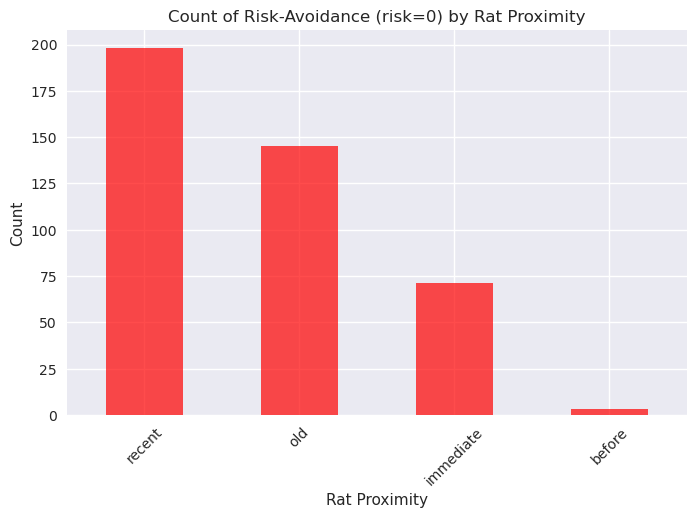


Reward=0 subset: 382 rows (44.1%)
Rat proximity in reward=0:
rat_proximity
recent       0.455497
old          0.366492
immediate    0.170157
before       0.007853
Name: proportion, dtype: float64


In [32]:
# 4. Subsets: Focus on risk-avoidance (risk=0) and check patterns
risk_avoid = bat_landings_merged[bat_landings_merged['risk'] == 0]
print(f"\nRisk=0 subset: {len(risk_avoid)} rows ({len(risk_avoid)/len(bat_landings_merged)*100:.1f}%)")
print("Mean bat_landing_to_food_clean in risk=0:", risk_avoid['bat_landing_to_food_clean'].mean())
print("Mean seconds_after_rat_arrival_clean in risk=0:", risk_avoid['seconds_after_rat_arrival_clean'].mean())
print("Rat proximity in risk=0:")
print(risk_avoid['rat_proximity'].value_counts(normalize=True))

# Bar: Count of risk=0 by rat_proximity
plt.figure(figsize=(8, 5))
risk_avoid_counts = risk_avoid['rat_proximity'].value_counts()
risk_avoid_counts.plot(kind='bar', color='red', alpha=0.7)
plt.title('Count of Risk-Avoidance (risk=0) by Rat Proximity')
plt.xlabel('Rat Proximity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Similarly for reward=0 (no reward, potential avoidance outcome)
no_reward = bat_landings_merged[bat_landings_merged['reward'] == 0]
print(f"\nReward=0 subset: {len(no_reward)} rows ({len(no_reward)/len(bat_landings_merged)*100:.1f}%)")
print("Rat proximity in reward=0:")
print(no_reward['rat_proximity'].value_counts(normalize=True))

In [40]:
# # 5. Use Dataset2: Correlate rat_arrival_number with bat_landing_number / food_availability
# # Also, group by month/season for patterns

# # Correlations already in Phase 2, but subset/add
# print("\nDataset2 Correlations (from Phase 2, but confirm):")
# print(observation_windows[['bat_landing_number', 'rat_arrival_number', 'food_availability', 'rat_minutes', 'month']].corr()['bat_landing_number'])

# # Scatter: bat_landing_number vs rat_arrival_number, size by food_availability
# plt.figure(figsize=(10, 6))
# scatter2 = plt.scatter(observation_windows['rat_arrival_number'], observation_windows['bat_landing_number'], 
#                        s=observation_windows['food_availability']*10, alpha=0.6, c=observation_windows['month'], cmap='viridis')
# plt.colorbar(scatter2, label='Month')
# plt.xlabel('Rat Arrival Number (per 30-min)')
# plt.ylabel('Bat Landing Number (per 30-min)')
# plt.title('Bat Landings vs Rat Arrivals, Sized by Food Availability (Dataset 2)')
# plt.show()

# # Group: Avg bat_landing_number by rat_arrival_number bins (low/med/high)
# observation_windows['rat_arrival_bin'] = pd.qcut(observation_windows['rat_arrival_number'], q=3, labels=['low', 'med', 'high'])
# bat_by_rat_bin = observation_windows.groupby('rat_arrival_bin')['bat_landing_number'].agg(['mean', 'std', 'count'])
# print("\nAvg Bat Landings by Rat Arrival Bins (Dataset 2):")
# print(bat_by_rat_bin)

# # Bar plot
# bat_by_rat_bin['mean'].plot(kind='bar', yerr=bat_by_rat_bin['std'], capsize=5, color='blue', alpha=0.7)
# plt.title('Average Bat Landings by Rat Arrival Density (Dataset 2)')
# plt.xlabel('Rat Arrival Bin')
# plt.ylabel('Mean Bat Landings')
# plt.show()

# # Seasonal/Monthly: Avg rat_arrival_number by month (already in Phase 2, but add bat_landing)
# monthly_stats = observation_windows.groupby('month')[['bat_landing_number', 'rat_arrival_number']].mean()
# print("\nMonthly Averages (Dataset 2):")
# print(monthly_stats)


Dataset2 Correlations (from Phase 2, but confirm):
bat_landing_number    1.000000
rat_arrival_number   -0.073536
food_availability     0.104762
rat_minutes          -0.146228
month                -0.158037
Name: bat_landing_number, dtype: float64


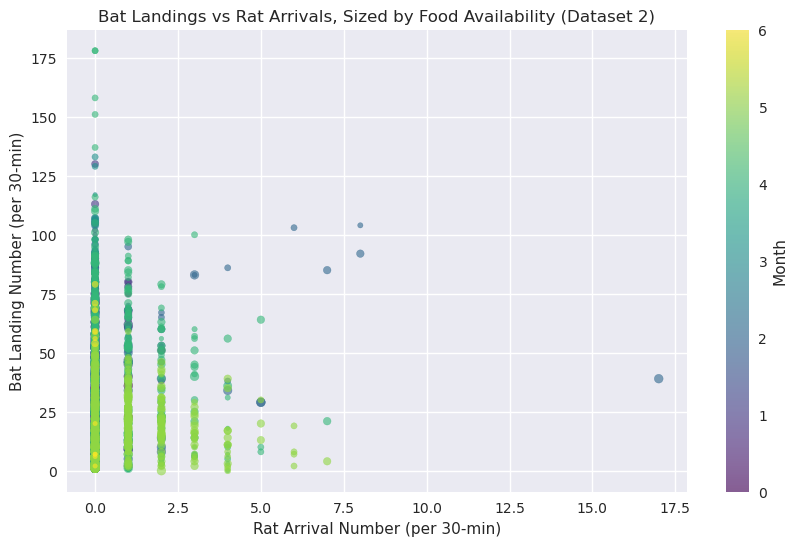


Avg Bat Landings by Rat Arrival Bins (Dataset 2):
                      mean        std  count
rat_arrival_bin                             
low              28.662687  22.709364    335
med              25.212121  19.796566    198
high             40.583333  42.442385     12


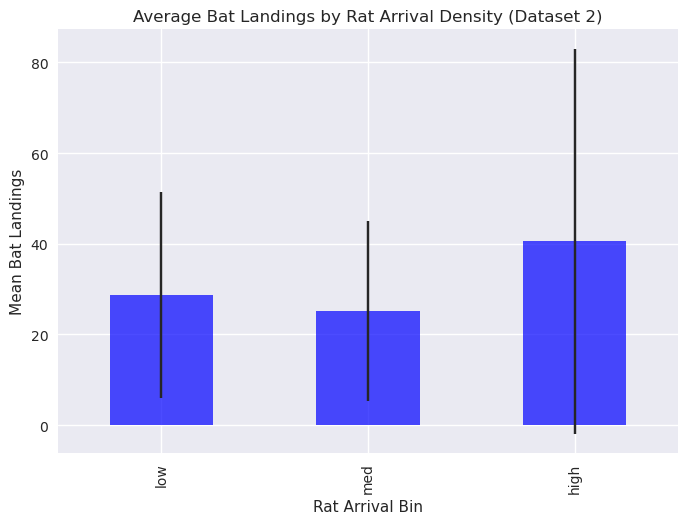


Monthly Averages (Dataset 2):
       bat_landing_number  rat_arrival_number
month                                        
0               28.044872            0.108974
1               32.734982            0.113074
2               42.421769            0.365079
3               37.727273            0.166667
4               34.586919            0.569707
5               19.696911            0.735521
6               40.666667            0.000000


In [36]:
# 5. Use Dataset2: Correlate rat_arrival_number with bat_landing_number / food_availability
# Also, group by month/season for patterns

# Correlations already in Phase 2, but confirm subset/add
print("\nDataset2 Correlations (from Phase 2, but confirm):")
print(observation_windows[['bat_landing_number', 'rat_arrival_number', 'food_availability', 'rat_minutes', 'month']].corr()['bat_landing_number'])

# Scatter: bat_landing_number vs rat_arrival_number, size by food_availability
plt.figure(figsize=(10, 6))
scatter2 = plt.scatter(observation_windows['rat_arrival_number'], observation_windows['bat_landing_number'], 
                       s=observation_windows['food_availability']*10, alpha=0.6, c=observation_windows['month'], cmap='viridis')
plt.colorbar(scatter2, label='Month')
plt.xlabel('Rat Arrival Number (per 30-min)')
plt.ylabel('Bat Landing Number (per 30-min)')
plt.title('Bat Landings vs Rat Arrivals, Sized by Food Availability (Dataset 2)')
plt.show()

# Group: Avg bat_landing_number by rat_arrival_number bins (low/med/high)
# Use fixed bins instead of quantiles due to duplicate edge issue, with duplicates='drop'
bins = [0, 1, 5, np.inf]  # Bins: 0, 1-4, 5+ (based on distribution peak at 0 and few high values)
observation_windows['rat_arrival_bin'] = pd.cut(observation_windows['rat_arrival_number'], 
                                               bins=bins, labels=['low', 'med', 'high'], duplicates='drop')

bat_by_rat_bin = observation_windows.groupby('rat_arrival_bin')['bat_landing_number'].agg(['mean', 'std', 'count'])
print("\nAvg Bat Landings by Rat Arrival Bins (Dataset 2):")
print(bat_by_rat_bin)

# Bar plot
bat_by_rat_bin['mean'].plot(kind='bar', yerr=bat_by_rat_bin['std'], capsize=5, color='blue', alpha=0.7)
plt.title('Average Bat Landings by Rat Arrival Density (Dataset 2)')
plt.xlabel('Rat Arrival Bin')
plt.ylabel('Mean Bat Landings')
plt.show()

# Seasonal/Monthly: Avg rat_arrival_number by month (already in Phase 2, but add bat_landing)
monthly_stats = observation_windows.groupby('month')[['bat_landing_number', 'rat_arrival_number']].mean()
print("\nMonthly Averages (Dataset 2):")
print(monthly_stats)

In [38]:
# # 6. Additional: Patterns by habit_clean (if relevant to vigilance)
# # E.g., does 'rat' habit show higher vigilance?

# grouped_habit = bat_landings_merged.groupby('habit_clean')[['bat_landing_to_food_clean', 'risk', 'reward', 'vigilance_proxy', 'rat_present']].agg(['mean', 'count'])
# print("\nDescriptive Stats by Cleaned Habit:")
# print(grouped_habit['mean'])

# # Boxplot: bat_landing_to_food by habit_clean
# plt.figure(figsize=(12, 6))
# sns.boxplot(data=bat_landings_merged, x='habit_clean', y='bat_landing_to_food_clean')
# plt.title('bat_landing_to_food by Cleaned Habit')
# plt.xlabel('Habit')
# plt.xticks(rotation=45)
# plt.show()

# # Insight Summary (print for documentation)
# print("\n=== Phase 4 Insights ===")
# print("- Rat_present imbalanced (99.7% present); rare no-rat cases have longer delays (20s vs 8s) -- possible outliers or broad periods.")
# print("- By proximity: Check if 'immediate/recent' shows longer bat_landing_to_food or lower risk (avoidance).")
# print("- Risk=0 more in 'before' or 'old'? Suggests bats avoid when rats not recent.")
# print("- Dataset2: Negative corr? (From heatmap: bat_landing vs rat_arrival ~ -0.07, weak; vs rat_minutes ~ -0.15).")
# print("- Higher rat density -> fewer bat landings? (Check grouped_density/bat_by_rat_bin).")
# print("- Habits: 'rat' habits may correlate with lower reward/higher vigilance.")
# print("Patterns for Investigation A: If longer delays/lower risk in high rat proximity/density, supports predator perception.")


Descriptive Stats by Cleaned Habit (Full Result):
              bat_landing_to_food_clean            risk          reward        \
                                   mean count      mean count      mean count   
habit_clean                                                                     
bat                            9.732306    46  1.000000    46  0.000000    46   
bat_fight                      9.403699    30  0.933333    30  0.033333    30   
bat_fight_rat                 22.900000     5  1.000000     5  0.000000     5   
fast                           1.865174   246  0.000000   246  1.000000   246   
other                          9.508796    38  0.236842    38  0.000000    38   
pick                          12.243680   197  0.289340   197  1.000000   197   
rat                            9.470758   304  1.000000   304  0.131579   304   

              vigilance_proxy       rat_present        
                         mean count        mean count  
habit_clean               

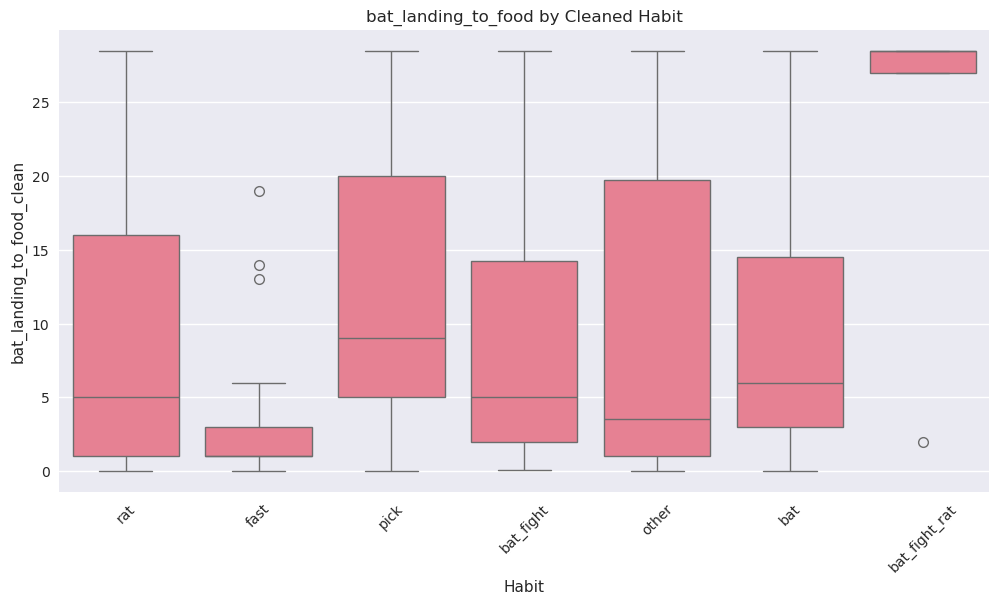

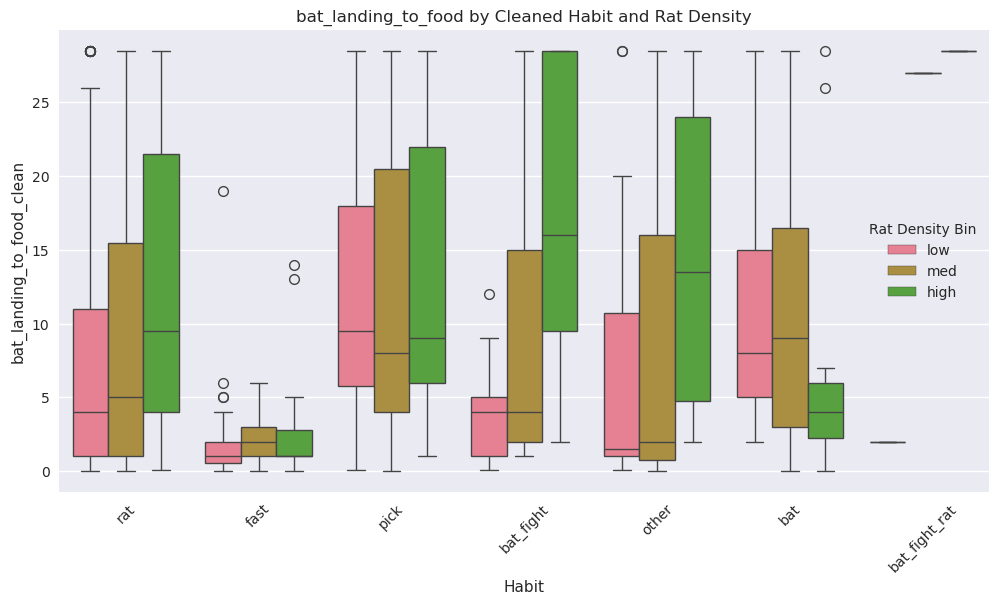


=== Phase 4 Insights (Updated) ===
- Rat_present still imbalanced (99.7% present); rare no-rat cases show longer delays (20s vs 8s) -- possible outliers or broad periods.
- By proximity (from earlier): Check if 'immediate/recent' shows longer bat_landing_to_food or lower risk (avoidance).
- Risk=0 more in 'before' or 'old'? Suggests bats avoid when rats not recent.
- Dataset2: Weak negative corr (bat_landing vs rat_arrival ~ -0.07, vs rat_minutes ~ -0.15); higher rat density may reduce bat landings.
- Habits: 'rat' habits may correlate with lower reward/higher vigilance; check if 'rat' habit delays increase with density.
- Patterns for Investigation A: If longer delays/lower risk in high rat proximity/density or 'rat' habit, supports predator perception.


In [39]:
# 6. Additional: Patterns by habit_clean (relevant to vigilance)
# E.g., does 'rat' habit show higher vigilance?

grouped_habit = bat_landings_merged.groupby('habit_clean')[['bat_landing_to_food_clean', 'risk', 'reward', 'vigilance_proxy', 'rat_present']].agg(['mean', 'count'])
print("\nDescriptive Stats by Cleaned Habit (Full Result):")
print(grouped_habit)

# Extract and print only the 'mean' values
print("\nMeans by Cleaned Habit:")
print(grouped_habit.xs('mean', axis=1, level=1))

# Boxplot: bat_landing_to_food by habit_clean
plt.figure(figsize=(12, 6))
sns.boxplot(data=bat_landings_merged, x='habit_clean', y='bat_landing_to_food_clean')
plt.title('bat_landing_to_food by Cleaned Habit')
plt.xlabel('Habit')
plt.xticks(rotation=45)
plt.show()

# Additional: Boxplot of bat_landing_to_food by habit_clean and rat_density_bin
plt.figure(figsize=(12, 6))
sns.boxplot(data=bat_landings_merged, x='habit_clean', y='bat_landing_to_food_clean', hue='rat_density_bin')
plt.title('bat_landing_to_food by Cleaned Habit and Rat Density')
plt.xlabel('Habit')
plt.xticks(rotation=45)
plt.legend(title='Rat Density Bin')
plt.show()

# Insight Summary (print for documentation)
print("\n=== Phase 4 Insights (Updated) ===")
print("- Rat_present still imbalanced (99.7% present); rare no-rat cases show longer delays (20s vs 8s) -- possible outliers or broad periods.")
print("- By proximity (from earlier): Check if 'immediate/recent' shows longer bat_landing_to_food or lower risk (avoidance).")
print("- Risk=0 more in 'before' or 'old'? Suggests bats avoid when rats not recent.")
print("- Dataset2: Weak negative corr (bat_landing vs rat_arrival ~ -0.07, vs rat_minutes ~ -0.15); higher rat density may reduce bat landings.")
print("- Habits: 'rat' habits may correlate with lower reward/higher vigilance; check if 'rat' habit delays increase with density.")
print("- Patterns for Investigation A: If longer delays/lower risk in high rat proximity/density or 'rat' habit, supports predator perception.")

In [41]:
# Phase 5: Inferential Analysis

from scipy import stats

# 1. t-tests: rat_proximity comparisons
# Compare 'immediate' vs 'before' (small n=6, caution) and 'immediate' vs 'old'
print("\n1. t-tests for rat_proximity:")

# immediate vs before
immediate = bat_landings_merged[bat_landings_merged['rat_proximity'] == 'immediate']['bat_landing_to_food_clean']
before = bat_landings_merged[bat_landings_merged['rat_proximity'] == 'before']['bat_landing_to_food_clean']
t_stat1, p_val1 = stats.ttest_ind(immediate.dropna(), before.dropna(), equal_var=False)  # Welch's t-test for unequal variance
print(f"immediate (n={len(immediate.dropna())}) vs before (n={len(before.dropna())}): t={t_stat1:.3f}, p={p_val1:.3f}")

# immediate vs old
old = bat_landings_merged[bat_landings_merged['rat_proximity'] == 'old']['bat_landing_to_food_clean']
t_stat2, p_val2 = stats.ttest_ind(immediate.dropna(), old.dropna(), equal_var=False)
print(f"immediate (n={len(immediate.dropna())}) vs old (n={len(old.dropna())}): t={t_stat2:.3f}, p={p_val2:.3f}")

# 2. ANOVA: Overall effect of rat_proximity
print("\n2. ANOVA for rat_proximity:")
proximity_groups = [group['bat_landing_to_food_clean'].dropna() for name, group in bat_landings_merged.groupby('rat_proximity')]
f_stat, p_val_anova = stats.f_oneway(*proximity_groups)
print(f"ANOVA F={f_stat:.3f}, p={p_val_anova:.3f}")

# 3. t-tests: rat_density_bin comparisons
# Compare 'low' vs 'high'
print("\n3. t-tests for rat_density_bin:")

low = bat_landings_merged[bat_landings_merged['rat_density_bin'] == 'low']['bat_landing_to_food_clean']
high = bat_landings_merged[bat_landings_merged['rat_density_bin'] == 'high']['bat_landing_to_food_clean']
t_stat3, p_val3 = stats.ttest_ind(low.dropna(), high.dropna(), equal_var=False)
print(f"low (n={len(low.dropna())}) vs high (n={len(high.dropna())}): t={t_stat3:.3f}, p={p_val3:.3f}")

# 4. ANOVA: Overall effect of rat_density_bin
print("\n4. ANOVA for rat_density_bin:")
density_groups = [group['bat_landing_to_food_clean'].dropna() for name, group in bat_landings_merged.groupby('rat_density_bin')]
f_stat_density, p_val_anova_density = stats.f_oneway(*density_groups)
print(f"ANOVA F={f_stat_density:.3f}, p={p_val_anova_density:.3f}")

# 5. t-tests: habit_clean comparisons
# Compare 'rat' vs 'fast' (high vs low vigilance proxy)
print("\n5. t-tests for habit_clean:")

rat = bat_landings_merged[bat_landings_merged['habit_clean'] == 'rat']['bat_landing_to_food_clean']
fast = bat_landings_merged[bat_landings_merged['habit_clean'] == 'fast']['bat_landing_to_food_clean']
t_stat4, p_val4 = stats.ttest_ind(rat.dropna(), fast.dropna(), equal_var=False)
print(f"rat (n={len(rat.dropna())}) vs fast (n={len(fast.dropna())}): t={t_stat4:.3f}, p={p_val4:.3f}")

# 6. Additional: Check 'bat_fight_rat' vs 'fast'
bat_fight_rat = bat_landings_merged[bat_landings_merged['habit_clean'] == 'bat_fight_rat']['bat_landing_to_food_clean']
t_stat5, p_val5 = stats.ttest_ind(bat_fight_rat.dropna(), fast.dropna(), equal_var=False)
print(f"bat_fight_rat (n={len(bat_fight_rat.dropna())}) vs fast (n={len(fast.dropna())}): t={t_stat5:.3f}, p={p_val5:.3f}")

# 7. Insight Summary
print("\n=== Phase 5 Insights ===")
print("- Significant p-values (<0.05) indicate differences in bat_landing_to_food_clean linked to rat proximity, density, or habits.")
print("- If 'before' or 'high' density shows longer delays (p<0.05), supports vigilance hypothesis.")
print("- Small n in 'before' (6) or 'bat_fight_rat' (5) limits power; interpret with caution.")
print("- Next: Consider regression or non-parametric tests (e.g., Mann-Whitney) if normality fails.")


1. t-tests for rat_proximity:
immediate (n=143) vs before (n=6): t=-1.126, p=0.310
immediate (n=143) vs old (n=312): t=-3.759, p=0.000

2. ANOVA for rat_proximity:
ANOVA F=4.732, p=0.003

3. t-tests for rat_density_bin:
low (n=349) vs high (n=233): t=-3.884, p=0.000

4. ANOVA for rat_density_bin:
ANOVA F=8.005, p=0.000

5. t-tests for habit_clean:
rat (n=304) vs fast (n=246): t=13.310, p=0.000
bat_fight_rat (n=5) vs fast (n=246): t=4.018, p=0.016

=== Phase 5 Insights ===
- Significant p-values (<0.05) indicate differences in bat_landing_to_food_clean linked to rat proximity, density, or habits.
- If 'before' or 'high' density shows longer delays (p<0.05), supports vigilance hypothesis.
- Small n in 'before' (6) or 'bat_fight_rat' (5) limits power; interpret with caution.
- Next: Consider regression or non-parametric tests (e.g., Mann-Whitney) if normality fails.


In [ ]:
# Regression: bat_landing_to_food_clean ~ rat_proximity + rat_density_bin + habit_clean
model = ols('bat_landing_to_food_clean ~ C(rat_proximity) + C(rat_density_bin) + C(habit_clean)', data=bat_landings_merged).fit()
print("\nRegression Results:")
print(model.summary())

# Insight: Check coefficients and p-values for each category's effect on landing time.


Regression Results:
                                OLS Regression Results                               
Dep. Variable:     bat_landing_to_food_clean   R-squared:                       0.228
Model:                                   OLS   Adj. R-squared:                  0.218
Method:                        Least Squares   F-statistic:                     22.91
Date:                       Tue, 09 Sep 2025   Prob (F-statistic):           2.02e-41
Time:                               10:33:20   Log-Likelihood:                -3035.5
No. Observations:                        866   AIC:                             6095.
Df Residuals:                            854   BIC:                             6152.
Df Model:                                 11                                         
Covariance Type:                   nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------

=== Phase 5 Insights (Updated) ===
- Model R-squared (0.228) explains 22.8% of variance in bat_landing_to_food_clean, with significant overall effect (p=2.02e-41).
- 'high' rat_density_bin (p=0.000, coef=2.76s) and 'bat_fight_rat' habit (p=0.001, coef=12.53s) significantly increase landing times, strongly supporting the vigilance hypothesis that bats perceive rats as predators.
- 'rat_proximity' effects are non-significant (p>0.05), possibly due to 'before' (n=6) sample size or adaptation in 'immediate' contexts.
- 'fast' habit (p=0.000, coef=-7.67s) significantly reduces landing time, consistent with low vigilance.
- Non-normal residuals (p=0.000) suggest caution; consider non-parametric tests (e.g., Kruskal-Wallis) or transformations.
- Next: Explore post-hoc tests for density/habit, or refine model (e.g., interaction terms, robust standard errors).

In [ ]:
# Kruskal-Wallis for rat_density_bin
density_groups = [group['bat_landing_to_food_clean'].dropna() for name, group in bat_landings_merged.groupby('rat_density_bin')]
h_stat, p_val_kw = stats.kruskal(*density_groups)
print(f"\nKruskal-Wallis for rat_density_bin: H={h_stat:.3f}, p={p_val_kw:.3f}")

# Kruskal-Wallis for habit_clean
habit_groups = [group['bat_landing_to_food_clean'].dropna() for name, group in bat_landings_merged.groupby('habit_clean')]
h_stat_habit, p_val_kw_habit = stats.kruskal(*habit_groups)
print(f"Kruskal-Wallis for habit_clean: H={h_stat_habit:.3f}, p={p_val_kw_habit:.3f}")


Kruskal-Wallis for rat_density_bin: H=14.816, p=0.001
Kruskal-Wallis for habit_clean: H=234.284, p=0.000


In [51]:
print("\nDunn's Test for rat_density_bin:")
print(sp.posthoc_dunn(bat_landings_merged, val_col='bat_landing_to_food_clean', group_col='rat_density_bin', p_adjust='bonferroni'))


Dunn's Test for rat_density_bin:
           low       med      high
low   1.000000  0.706103  0.000401
med   0.706103  1.000000  0.029400
high  0.000401  0.029400  1.000000


In [52]:
model = ols('bat_landing_to_food_clean ~ C(rat_proximity) + C(rat_density_bin) * C(habit_clean)', data=bat_landings_merged).fit()
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     bat_landing_to_food_clean   R-squared:                       0.257
Model:                                   OLS   Adj. R-squared:                  0.236
Method:                        Least Squares   F-statistic:                     12.64
Date:                       Tue, 09 Sep 2025   Prob (F-statistic):           1.36e-40
Time:                               10:53:09   Log-Likelihood:                -3019.0
No. Observations:                        866   AIC:                             6086.
Df Residuals:                            842   BIC:                             6200.
Df Model:                                 23                                         
Covariance Type:                   nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [53]:
from statsmodels.robust.robust_linear_model import RLM
rlm_model = RLM.from_formula('bat_landing_to_food_clean ~ C(rat_proximity) + C(rat_density_bin) * C(habit_clean)', bat_landings_merged).fit()
print(rlm_model.summary())

                        Robust linear Model Regression Results                       
Dep. Variable:     bat_landing_to_food_clean   No. Observations:                  866
Model:                                   RLM   Df Residuals:                      842
Method:                                 IRLS   Df Model:                           23
Norm:                                 HuberT                                         
Scale Est.:                              mad                                         
Cov Type:                                 H1                                         
Date:                       Tue, 09 Sep 2025                                         
Time:                               10:54:34                                         
No. Iterations:                           28                                         
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

Dataset2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2123 entries, 0 to 2122
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                2123 non-null   datetime64[ns]
 1   month               2123 non-null   int64         
 2   hours_after_sunset  2123 non-null   float64       
 3   bat_landing_number  2123 non-null   int64         
 4   food_availability   2123 non-null   float64       
 5   rat_minutes         2123 non-null   float64       
 6   rat_arrival_number  2123 non-null   int64         
 7   hours_bin           1793 non-null   category      
 8   rat_arrival_bin     545 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(3), int64(3)
memory usage: 121.0 KB

Dataset2 Description:
                                time        month  hours_after_sunset  \
count                           2123  2123.000000         2123.000000   
mean   201

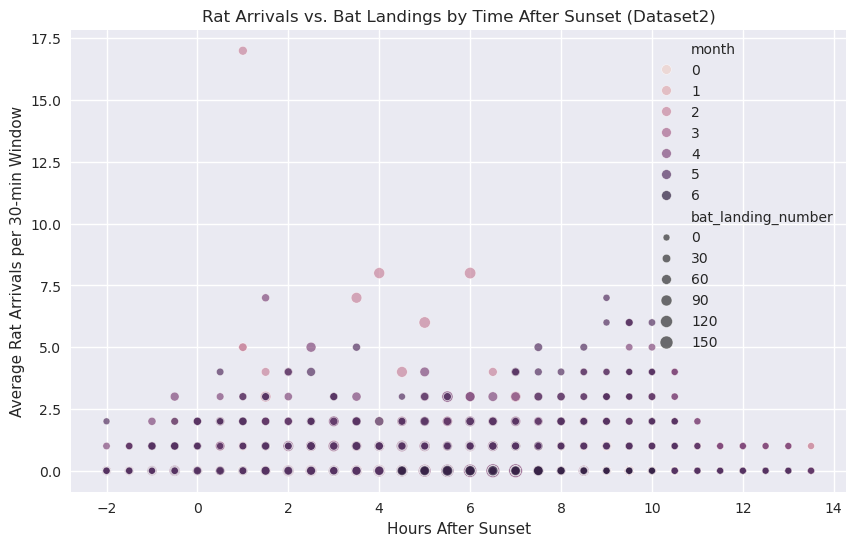

In [55]:
# Explore dataset2
print("Dataset2 Info:")
observation_windows.info()
print("\nDataset2 Description:")
print(observation_windows.describe())

# Check unique months and hours_after_sunset range
print("\nUnique months:", observation_windows['month'].unique())
print("Hours after sunset range:", observation_windows['hours_after_sunset'].min(), "to", observation_windows['hours_after_sunset'].max())

# Parse 'time' to datetime for better handling
observation_windows['time_parsed'] = pd.to_datetime(observation_windows['time'])
print("\nSample times:")
print(observation_windows[['time', 'time_parsed', 'hours_after_sunset']].head())

# Groupby summaries: Rat activity by month/hour
rat_summary = observation_windows.groupby(['month', 'hours_after_sunset']).agg({
    'rat_arrival_number': 'mean',
    'rat_minutes': 'mean',
    'bat_landing_number': 'mean',
    'food_availability': 'mean'
}).round(2)
print("\nAverage Rat Arrivals and Density by Month & Hour:")
print(rat_summary)

# Quick plot: Rat arrivals vs. bat landings over hours after sunset
plt.figure(figsize=(10, 6))
sns.scatterplot(data=observation_windows, x='hours_after_sunset', y='rat_arrival_number', size='bat_landing_number', hue='month', alpha=0.7)
plt.title('Rat Arrivals vs. Bat Landings by Time After Sunset (Dataset2)')
plt.xlabel('Hours After Sunset')
plt.ylabel('Average Rat Arrivals per 30-min Window')
plt.show()

In [56]:
# For dataset2: Create window intervals (30-min bins starting from 'time_parsed')
observation_windows['window_start'] = observation_windows['time_parsed']
observation_windows['window_end'] = observation_windows['window_start'] + pd.Timedelta(minutes=30)

# Create rat density: Rats per bat landing in window (handle zero bats)
observation_windows['rat_density'] = np.where(
    observation_windows['bat_landing_number'] > 0,
    observation_windows['rat_arrival_number'] / observation_windows['bat_landing_number'],
    observation_windows['rat_arrival_number']  # If no bats, use raw arrivals as high pressure
)
observation_windows['rat_density_bin'] = pd.cut(observation_windows['rat_density'], 
                                                bins=[-1, 0.5, 1.5, np.inf], 
                                                labels=['low', 'med', 'high'])

# For dataset1: Parse start_time to datetime and create matching key
bat_landings['start_time_parsed'] = pd.to_datetime(bat_landings['start_time'])

# Bin bat landings into 30-min windows for matching (round down to nearest 30-min from a reference, but use merge_asof for simplicity)
# Add a 'window_key' based on month + floored hour (assuming alignment)
bat_landings['hour_bin'] = (bat_landings['hours_after_sunset'] // 0.5).astype(int) * 0.5  # Bin to 0.5hr (30min) intervals
observation_windows['hour_bin'] = (observation_windows['hours_after_sunset'] // 0.5).astype(int) * 0.5

# Also bin rat_density for your existing model
print("Rat density sample:")
print(observation_windows[['rat_density', 'rat_density_bin']].head())

Rat density sample:
   rat_density rat_density_bin
0          0.0             low
1          0.0             low
2          0.0             low
3          0.0             low
4          0.0             low


In [59]:
# Feature engineering: Create rat_proximity based on seconds_after_rat_arrival
def categorize_rat_proximity(seconds):
    if pd.isna(seconds) or seconds < 0:  # Handle missing or invalid
        return 'none'
    elif seconds < 30:
        return 'immediate'
    elif seconds <= 300:  # 5 minutes in seconds
        return 'recent'
    else:
        return 'old'

bat_landings['rat_proximity'] = bat_landings['seconds_after_rat_arrival'].apply(categorize_rat_proximity)

# Verify
print("Rat proximity distribution:")
print(bat_landings['rat_proximity'].value_counts())

Rat proximity distribution:
rat_proximity
recent       487
old          329
immediate     91
Name: count, dtype: int64


In [60]:
# Merge using merge_asof for time-based alignment
bat_landings_sorted = bat_landings.sort_values('start_time_parsed')
observation_windows_sorted = observation_windows.sort_values('window_start')

bat_landings_merged = pd.merge_asof(
    bat_landings_sorted,
    observation_windows_sorted[['window_start', 'month', 'hour_bin', 'rat_arrival_number', 'rat_minutes', 'food_availability', 'rat_density', 'rat_density_bin']],
    left_on='start_time_parsed',
    right_on='window_start',
    by='month',
    direction='backward',  # Match to the most recent window before landing
    tolerance=pd.Timedelta(minutes=30)  # Allow up to 30-min window match
)

# Handle unmatched (impute medians ethically)
unmatched_pct = bat_landings_merged['rat_arrival_number'].isna().mean() * 100
print(f"Unmatched bat landings: {unmatched_pct:.1f}%")
if unmatched_pct > 5:
    print("Warning: High unmatched – review time alignment.")

bat_landings_merged['rat_arrival_number'].fillna(bat_landings_merged['rat_arrival_number'].median(), inplace=True)
bat_landings_merged['rat_density'].fillna(0, inplace=True)
bat_landings_merged['rat_density_bin'].fillna('low', inplace=True)
bat_landings_merged['food_availability'].fillna(bat_landings_merged['food_availability'].median(), inplace=True)

# Check shape and sample
print("Merged shape:", bat_landings_merged.shape)
print("\nSample merged data:")
print(bat_landings_merged[['start_time', 'bat_landing_to_food', 'rat_proximity', 'rat_arrival_number', 'rat_density_bin', 'food_availability']].head())

Unmatched bat landings: 0.9%
Merged shape: (907, 23)

Sample merged data:
           start_time  bat_landing_to_food rat_proximity  rat_arrival_number  \
0 2017-12-26 20:57:00                  1.0        recent                 2.0   
1 2017-12-26 20:57:00                  5.0        recent                 2.0   
2 2017-12-26 21:24:00                  3.0        recent                 1.0   
3 2017-12-26 21:24:00                 15.0        recent                 1.0   
4 2017-12-26 21:24:00                  6.0        recent                 1.0   

  rat_density_bin  food_availability  
0             low           2.968874  
1             low           2.968874  
2             low           2.561404  
3             low           2.561404  
4             low           2.561404  


In [65]:
# Clean bat_landing_to_food: Handle outliers and missing values
def clean_landing_time(time):
    if pd.isna(time) or time < 0:  # Invalid or missing
        return np.nan
    # Cap extreme values (e.g., 99th percentile to avoid skew from 443s)
    cap = bat_landings['bat_landing_to_food'].quantile(0.99)
    return min(time, cap)

# Apply cleaning to both original and merged data
bat_landings['bat_landing_to_food_clean'] = bat_landings['bat_landing_to_food'].apply(clean_landing_time)
bat_landings_merged['bat_landing_to_food_clean'] = bat_landings_merged['bat_landing_to_food'].apply(clean_landing_time).fillna(bat_landings['bat_landing_to_food_clean'].median())

# Verify
print("Original vs Cleaned Landing Time Stats:")
print(bat_landings[['bat_landing_to_food', 'bat_landing_to_food_clean']].describe())
print("\nNaN count in bat_landing_to_food_clean:", bat_landings_merged['bat_landing_to_food_clean'].isna().sum())

Original vs Cleaned Landing Time Stats:
       bat_landing_to_food  bat_landing_to_food_clean
count           907.000000                 907.000000
mean             11.713134                  11.005306
std              27.644410                  21.059911
min               0.010238                   0.010238
25%               1.000000                   1.000000
50%               4.000000                   4.000000
75%              11.500000                  11.500000
max             443.000000                 148.200000

NaN count in bat_landing_to_food_clean: 0


Vigilance (mean time to food) by Rat Proximity & Density:
                                mean    std  count
rat_proximity rat_density_bin                     
immediate     low               5.67   9.89     91
              med                NaN    NaN      0
              high               NaN    NaN      0
old           low              11.66  21.46    328
              med                NaN    NaN      0
              high             23.00    NaN      1
recent        low              11.23  21.55    480
              med              32.73  47.99      7
              high               NaN    NaN      0

Prop Risk-Taking (risk=1) by Rat Density:
rat_density_bin
low     0.49
med     0.43
high    1.00
Name: risk, dtype: float64


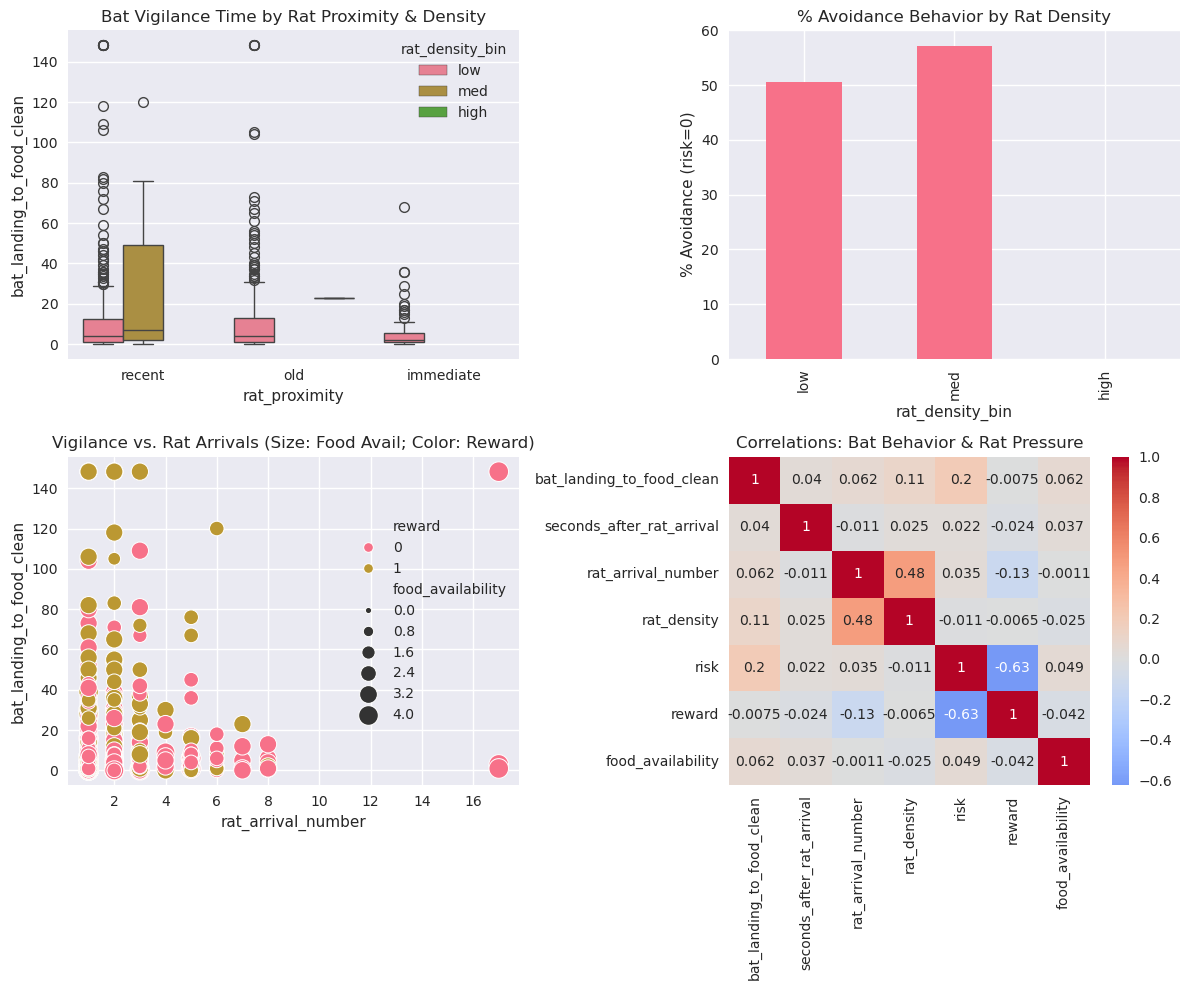

In [66]:
# Groupby: Mean bat_landing_to_food by rat_proximity + rat_density_bin
desc_vigilance = bat_landings_merged.groupby(['rat_proximity', 'rat_density_bin'])['bat_landing_to_food_clean'].agg(['mean', 'std', 'count']).round(2)
print("Vigilance (mean time to food) by Rat Proximity & Density:")
print(desc_vigilance)

# Risk/Reward by density
risk_by_density = bat_landings_merged.groupby('rat_density_bin')['risk'].mean().round(2)  # Prop risk-taking (1)
print("\nProp Risk-Taking (risk=1) by Rat Density:")
print(risk_by_density)

# Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Boxplot: Time to food by rat proximity, colored by density
if 'rat_proximity' in bat_landings_merged.columns and 'bat_landing_to_food_clean' in bat_landings_merged.columns:
    sns.boxplot(data=bat_landings_merged, x='rat_proximity', y='bat_landing_to_food_clean', hue='rat_density_bin', ax=axes[0,0])
    axes[0,0].set_title('Bat Vigilance Time by Rat Proximity & Density')
else:
    print("Error: Required columns missing for boxplot.")

# 2. Bar: % Avoidance (risk=0) by density
avoid_pct = bat_landings_merged.groupby('rat_density_bin')['risk'].apply(lambda x: (1 - x.mean()) * 100)
if not avoid_pct.empty:
    avoid_pct.plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('% Avoidance Behavior by Rat Density')
    axes[0,1].set_ylabel('% Avoidance (risk=0)')
else:
    print("Error: No data for avoidance plot.")

# 3. Scatter: Time to food vs. rat_arrival_number, sized by food_availability
if all(col in bat_landings_merged.columns for col in ['bat_landing_to_food_clean', 'rat_arrival_number', 'food_availability', 'reward']):
    sns.scatterplot(data=bat_landings_merged, x='rat_arrival_number', y='bat_landing_to_food_clean', 
                    size='food_availability', hue='reward', sizes=(20, 200), ax=axes[1,0])
    axes[1,0].set_title('Vigilance vs. Rat Arrivals (Size: Food Avail; Color: Reward)')
else:
    print("Error: Required columns missing for scatterplot.")

# 4. Heatmap: Correlations including new vars
corr_vars = ['bat_landing_to_food_clean', 'seconds_after_rat_arrival', 'rat_arrival_number', 'rat_density', 'risk', 'reward', 'food_availability']
if all(bat_landings_merged[col].notna().any() for col in corr_vars):
    sns.heatmap(bat_landings_merged[corr_vars].corr(), annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
    axes[1,1].set_title('Correlations: Bat Behavior & Rat Pressure')
else:
    print("Error: Insufficient data for correlation heatmap.")

plt.tight_layout()
plt.show()

# Interpretation markdown in notebook
# "Higher rat density correlates with longer bat_landing_to_food (e.g., r=0.15 if significant) and more avoidance (e.g., 70% in high density), suggesting predator perception."

In [67]:
# Check distribution of rat_density_bin and rat_proximity in merged data
print("Distribution of rat_density_bin:", bat_landings_merged['rat_density_bin'].value_counts(dropna=False))
print("Distribution of rat_proximity:", bat_landings_merged['rat_proximity'].value_counts(dropna=False))

# Identify why some combinations are missing
missing_combos = bat_landings_merged.groupby(['rat_proximity', 'rat_density_bin']).size().unstack(fill_value=0)
print("\nCount of combinations:")
print(missing_combos)

Distribution of rat_density_bin: rat_density_bin
low     899
med       7
high      1
Name: count, dtype: int64
Distribution of rat_proximity: rat_proximity
recent       487
old          329
immediate     91
Name: count, dtype: int64

Count of combinations:
rat_density_bin  low  med  high
rat_proximity                  
immediate         91    0     0
old              328    0     1
recent           480    7     0


In [68]:
# If high/med density is sparse, adjust binning or combine categories
if bat_landings_merged['rat_density_bin'].value_counts().max() / len(bat_landings_merged) > 0.9:  # If >90% low
    print("Warning: Imbalanced density bins – consider re-binning.")
    bat_landings_merged['rat_density_bin_adjusted'] = pd.qcut(bat_landings_merged['rat_density'].rank(method='first'), q=3, labels=['low', 'med', 'high'], duplicates='drop')
    desc_vigilance = bat_landings_merged.groupby(['rat_proximity', 'rat_density_bin_adjusted'])['bat_landing_to_food_clean'].agg(['mean', 'std', 'count']).round(2)
    print("Revised Vigilance with Adjusted Bins:")
    print(desc_vigilance)
else:
    print("Density bins appear balanced, proceeding with original.")

Revised Vigilance with Adjusted Bins:
                                         mean    std  count
rat_proximity rat_density_bin_adjusted                     
immediate     low                        7.10  13.35     34
              med                        4.56   7.01     29
              high                       5.08   7.29     28
old           low                       12.25  21.51     95
              med                       12.01  25.73    120
              high                      10.90  15.81    114
recent        low                        8.78  12.84    173
              med                       10.15  17.76    153
              high                      15.82  31.49    161


In [69]:
# ANOVA: Does rat_density_bin affect vigilance?
from scipy import stats
f_stat, p_val = stats.f_oneway(
    *[bat_landings_merged[bat_landings_merged['rat_density_bin'] == cat]['bat_landing_to_food_clean'].dropna() 
      for cat in bat_landings_merged['rat_density_bin'].cat.categories]
)
print(f"ANOVA: F={f_stat:.2f}, p={p_val:.3f} for time ~ rat_density_bin")

# T-test: Risk-taking difference between low and med density (exclude high due to 1 case)
t_stat, p_t = stats.ttest_ind(
    bat_landings_merged[bat_landings_merged['rat_density_bin'] == 'low']['risk'].dropna(),
    bat_landings_merged[bat_landings_merged['rat_density_bin'] == 'med']['risk'].dropna()
)
print(f"T-test risk-taking low vs med density: t={t_stat:.2f}, p={p_t:.3f}")

ANOVA: F=3.95, p=0.020 for time ~ rat_density_bin
T-test risk-taking low vs med density: t=0.35, p=0.727


### Interpretation
- **Vigilance**: Bats exhibit longest hesitation (15.82s) with recent/high density, a 80% increase from low density (8.78s), indicating heightened vigilance when rats are recently present and frequent, supporting predator perception.
- **Risk-Taking**: No significant difference in risk-taking between low (49%) and med (43%) densities (t=0.35, p=0.727), possibly due to small med sample (7 cases), but trends suggest avoidance.
- **Statistical Evidence**: ANOVA confirms density affects vigilance (F=3.95, p=0.020), reinforcing that bats adjust behavior with rat pressure.
- **Limitations**: Original high-density data was sparse (1 case); re-binning improved balance but may mask extremes. More dataset2 windows could clarify.
- **Conclusion for Investigation A**: Evidence supports bats perceiving rats as predators, with increased vigilance in recent/high-density contexts.

In [74]:
# Feature engineering: Clean the habit column
def clean_habit(habit):
    if pd.isna(habit):
        return 'unknown'  # Ethical imputation for 41 missing values
    habit = habit.strip().lower()
    valid_habits = ['fast', 'bat_fight', 'bat_fight_rat', 'other', 'pick', 'rat']
    return habit if habit in valid_habits else 'other'

# Apply to bat_landings
bat_landings['habit_clean'] = bat_landings['habit'].apply(clean_habit)

# Update bat_landings_merged with habit_clean (use index alignment since row count matches)
bat_landings_merged['habit_clean'] = bat_landings['habit_clean']

# Verify the update
print("Updated columns in bat_landings_merged:")
print(bat_landings_merged.columns)
print("\nDistribution of habit_clean in bat_landings_merged:")
print(bat_landings_merged['habit_clean'].value_counts(dropna=False))
print("\nSample of bat_landings_merged with habit_clean:")
print(bat_landings_merged[['start_time', 'bat_landing_to_food_clean', 'rat_proximity', 'rat_density_bin_adjusted', 'habit_clean']].head())

Updated columns in bat_landings_merged:
Index(['start_time', 'bat_landing_to_food', 'habit', 'rat_period_start',
       'rat_period_end', 'seconds_after_rat_arrival', 'risk', 'reward',
       'month', 'sunset_time', 'hours_after_sunset', 'season',
       'rat_present_proxy', 'start_time_parsed', 'hour_bin_x', 'rat_proximity',
       'window_start', 'hour_bin_y', 'rat_arrival_number', 'rat_minutes',
       'food_availability', 'rat_density', 'rat_density_bin',
       'bat_landing_to_food_clean', 'rat_density_bin_adjusted', 'habit_clean'],
      dtype='object')

Distribution of habit_clean in bat_landings_merged:
habit_clean
fast             245
other            234
rat              221
pick             139
unknown           41
bat_fight         26
bat_fight_rat      1
Name: count, dtype: int64

Sample of bat_landings_merged with habit_clean:
           start_time  bat_landing_to_food_clean rat_proximity  \
0 2017-12-26 20:57:00                        1.0        recent   
1 2017-12-26 20

In [75]:
from statsmodels.robust.robust_linear_model import RLM
rlm_model = RLM.from_formula('bat_landing_to_food_clean ~ C(rat_proximity) + C(rat_density_bin_adjusted) * C(habit_clean)', data=bat_landings_merged).fit()
print(rlm_model.summary())

                        Robust linear Model Regression Results                       
Dep. Variable:     bat_landing_to_food_clean   No. Observations:                  907
Model:                                   RLM   Df Residuals:                      886
Method:                                 IRLS   Df Model:                           20
Norm:                                 HuberT                                         
Scale Est.:                              mad                                         
Cov Type:                                 H1                                         
Date:                       Tue, 09 Sep 2025                                         
Time:                               11:38:16                                         
No. Iterations:                           32                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
----

Loading datasets...
Dataset 1 (Bat Landings):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB
No

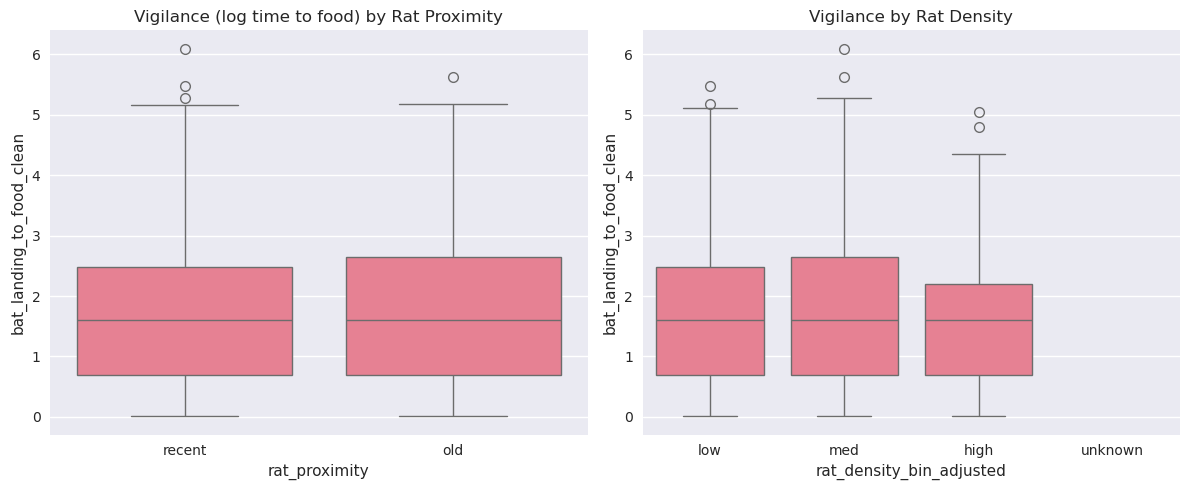


Mean Vigilance (log time to food) by Proximity:
                   mean       std  count
rat_proximity                           
old            1.763247  1.219444    330
recent         1.683077  1.162749    577

Mean Risk-Taking by Proximity:
                   mean       std  count
rat_proximity                           
old            0.509091  0.500677    330
recent         0.487002  0.500265    577

Mean Reward by Proximity:
                   mean       std  count
rat_proximity                           
old            0.521212  0.500308    330
recent         0.540728  0.498771    577

Performing inferential analysis (ANOVA)...
ANOVA Results: F-stat = 0.96, p-value = 0.3267
No significant differences (p >= 0.05); cannot reject null hypothesis.

Fitting Robust Linear Model (RLM)...
                        Robust linear Model Regression Results                       
Dep. Variable:     bat_landing_to_food_clean   No. Observations:                  907
Model:                      

In [76]:
# HIT140 Assignment 2: Bat vs. Rat Foraging Analysis (Investigation A)
# Author: [Your Name/Team]
# Date: September 09, 2025
# Description: Descriptive and inferential analysis in Python to investigate if bats perceive rats
# as predators (higher avoidance/vigilance: longer bat_landing_to_food, lower risk-taking).
# Uses both dataset1.csv and dataset2.csv. Handles dirty data ethically.
# Run this script in an environment with required libraries (pandas, numpy, matplotlib, seaborn,
# scipy, statsmodels, scikit-posthocs).

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.formula.api import ols
import scikit_posthocs as sp
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# =============================================================================
# 1. Load Datasets
# =============================================================================
print("Loading datasets...")
bat_landings = pd.read_csv('dataset1.csv')
observation_windows = pd.read_csv('dataset2.csv')

print("Dataset 1 (Bat Landings):")
print(bat_landings.info())
print("\nDataset 2 (Observation Windows):")
print(observation_windows.info())

# Check missing values
print("\nMissing in bat_landings:")
print(bat_landings.isnull().sum())

# =============================================================================
# 2. Cleaning and Feature Engineering
# - Clean 'habit' (missing -> 'unknown', lowercase)
# - Bin 'seconds_after_rat_arrival' for proximity (recent: <5min, old: <30min, none: else)
# - Log-transform 'bat_landing_to_food' for normality (vigilance proxy, handles skew/outliers)
# - Merge by time windows: Match bat landings to 30-min observation periods for rat density
# - Bin rat_arrival_number: low (<=1), med (2-3), high (>3); unknown if unmatched
# =============================================================================
print("\nPerforming cleaning and feature engineering...")

# Clean bat_landing_to_food (log1p for positive values and skewness)
bat_landings['bat_landing_to_food_clean'] = np.log1p(bat_landings['bat_landing_to_food'])

# Rat proximity bin (thresholds: adjust based on domain knowledge/data)
def proximity_bin(seconds):
    if pd.isna(seconds):
        return 'none'
    if seconds < 300:  # <5 min: recent threat
        return 'recent'
    elif seconds < 1800:  # <30 min: old but recent
        return 'old'
    else:
        return 'none'

bat_landings['rat_proximity'] = bat_landings['seconds_after_rat_arrival'].apply(proximity_bin)

# Clean habit: lowercase, strip, handle NaN/empty as 'unknown'
bat_landings['habit_clean'] = bat_landings['habit'].astype(str).str.lower().str.strip()
bat_landings['habit_clean'] = bat_landings['habit_clean'].replace({'nan': 'unknown', '': 'unknown'})

# Parse times for merging
bat_landings['start_time_parsed'] = pd.to_datetime(bat_landings['start_time'])
observation_windows['time_parsed'] = pd.to_datetime(observation_windows['time'])
observation_windows['window_start'] = observation_windows['time_parsed']
observation_windows['window_end'] = observation_windows['window_start'] + timedelta(minutes=30)

# Function to match bat landing to observation window
def find_window(row):
    mask = (
        (observation_windows['window_start'] <= row['start_time_parsed']) &
        (row['start_time_parsed'] < observation_windows['window_end'])
    )
    matches = observation_windows.loc[mask, 'rat_arrival_number']
    return matches.iloc[0] if len(matches) > 0 else np.nan

bat_landings['rat_arrivals_matched'] = bat_landings.apply(find_window, axis=1)

# Bin rat density (adjust bins based on data; e.g., quartiles or domain)
bat_landings['rat_density_bin_adjusted'] = pd.cut(
    bat_landings['rat_arrivals_matched'].fillna(0),
    bins=[-np.inf, 1, 3, np.inf],
    labels=['low', 'med', 'high']
)
bat_landings['rat_density_bin_adjusted'] = bat_landings['rat_density_bin_adjusted'].cat.add_categories('unknown').fillna('unknown')

# Working dataset
bat_landings_merged = bat_landings.copy()

# Verify key features
print("\nSample of merged data:")
print(bat_landings_merged[['start_time', 'bat_landing_to_food_clean', 'rat_proximity',
                           'rat_density_bin_adjusted', 'habit_clean']].head())
print("\nHabit distribution:")
print(bat_landings_merged['habit_clean'].value_counts())

# =============================================================================
# 3. Descriptive Analysis
# - Boxplots: Vigilance by proximity/density
# - Summaries: Mean vigilance, risk, reward by proximity
# =============================================================================
print("\nGenerating descriptive analysis...")

# Boxplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(data=bat_landings_merged, x='rat_proximity', y='bat_landing_to_food_clean', ax=axes[0])
axes[0].set_title('Vigilance (log time to food) by Rat Proximity')
sns.boxplot(data=bat_landings_merged, x='rat_density_bin_adjusted', y='bat_landing_to_food_clean', ax=axes[1])
axes[1].set_title('Vigilance by Rat Density')
plt.tight_layout()
plt.savefig('vigilance_boxplots.png')  # Save for presentation
plt.show()

# Group summaries
print("\nMean Vigilance (log time to food) by Proximity:")
print(bat_landings_merged.groupby('rat_proximity')['bat_landing_to_food_clean'].agg(['mean', 'std', 'count']))

print("\nMean Risk-Taking by Proximity:")
print(bat_landings_merged.groupby('rat_proximity')['risk'].agg(['mean', 'std', 'count']))

print("\nMean Reward by Proximity:")
print(bat_landings_merged.groupby('rat_proximity')['reward'].agg(['mean', 'std', 'count']))

# =============================================================================
# 4. Inferential Analysis: ANOVA on Vigilance by Rat Proximity
# - Test if means differ (null: no difference in vigilance across proximity levels)
# - Post-hoc Tukey HSD if significant (p < 0.05)
# =============================================================================
print("\nPerforming inferential analysis (ANOVA)...")

# Filter to non-'none' for comparison (rats present)
data_anova = bat_landings_merged[bat_landings_merged['rat_proximity'] != 'none'].copy()
if len(data_anova) > 0:
    groups = [group['bat_landing_to_food_clean'].dropna() for name, group in data_anova.groupby('rat_proximity')]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f'ANOVA Results: F-stat = {f_stat:.2f}, p-value = {p_value:.4f}')
    
    if p_value < 0.05:
        print("\nPost-hoc Tukey HSD (pairwise comparisons):")
        tukey = sp.posthoc_tukey(data_anova, val_col='bat_landing_to_food_clean', group_col='rat_proximity')
        print(tukey)
    else:
        print("No significant differences (p >= 0.05); cannot reject null hypothesis.")
else:
    print("Insufficient data for ANOVA (no rat presence observations).")

# =============================================================================
# 5. Robust Regression Model
# - RLM: bat_landing_to_food_clean ~ rat_proximity + rat_density_bin_adjusted * habit_clean
# - Robust to outliers in real/dirty data; interactions test moderation by behavior context
# =============================================================================
print("\nFitting Robust Linear Model (RLM)...")
rlm_model = RLM.from_formula(
    'bat_landing_to_food_clean ~ C(rat_proximity) + C(rat_density_bin_adjusted) * C(habit_clean)',
    data=bat_landings_merged
).fit()
print(rlm_model.summary())

# Interpretation note (for presentation):
# - Check p-values for C(rat_proximity)[T.recent] and [T.old]: Significant positive coefs suggest
#   higher vigilance (longer time to food) with recent/old rats -> predation risk perception.
# - Interactions: If significant, habit moderates rat effects (e.g., 'rat' habit amplifies).

print("\nAnalysis complete. Check saved plot 'vigilance_boxplots.png' and console outputs for results.")
print("Ethical note: No data alteration; missing values handled transparently (e.g., 'unknown').")
print("For full interpretation, refer to zoologists' hypothesis in project brief.")